In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as py
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [4]:
data=pd.read_csv('DriveArabia_All_uae_updated.csv')

In [6]:
data

Link  \
0     https://www.drivearabia.com/carprices/uae/merc...   
1     https://www.drivearabia.com/carprices/uae/jeep...   
2     https://www.drivearabia.com/carprices/uae/niss...   
3     https://www.drivearabia.com/carprices/uae/lamb...   
4     https://www.drivearabia.com/carprices/uae/dodg...   
...                                                 ...   
7642  https://www.drivearabia.com/carprices/uae/bmw/...   
7643  https://www.drivearabia.com/carprices/uae/cadi...   
7644  https://www.drivearabia.com/carprices/uae/chry...   
7645  https://www.drivearabia.com/carprices/uae/jagu...   
7646  https://www.drivearabia.com/carprices/uae/suzu...   

                              Approx Cost  Origin Country Sale Country  \
0                     AED 37,200 - 61,000         Germany          uae   
1             AED 67,700 - 69,900 (Sport)   United States          uae   
2         AED 22,700 - 24,700 (Panel Van)           Japan          uae   
3                   AED 602,300 - 697,400           Italy          uae   
4     AED 166,400 - 185,600 (SRT HellCat)          Canada          uae   
...                                   ...             ...          ...   
7642         AED 104,600 - 117,900 (640i)         Germany          uae   
7643                  AED 15,700 - 26,100   United States          uae   
7644                    AED 3,900 - 4,300         Austria          uae   
7645      AED 116,700 - 144,100 (2.0L TC)  United Kingdom          uae   
7646                  AED 17,100 - 18,100       Indonesia          uae   

       Manufacturer                Brand  Model Year               Body Type  \
0     Mercedes-Benz            CLS-Class        2006    Luxury Midsize Sedan   
1              Jeep   Wrangler Unlimited        2015             Midsize SUV   
2            Nissan                Urvan        2007  Commercial Midsize Van   
3       Lamborghini       Huracan Spyder        2017    Premium Sports Coupe   
4             Dodge          Charger SRT        2019     Premium Large Sedan   
...             ...                  ...         ...                     ...   
7642            BMW  6-Series Gran Coupe        2014    Luxury Midsize Sedan   
7643       Cadillac                  STS        2006      Luxury Large Sedan   
7644       Chrysler           PT Cruiser        2002         Compact Minivan   
7645         Jaguar                   XJ        2017      Luxury Large Sedan   
7646         Suzuki                Carry        2015          Midsize Pickup   

                      Additional Type               Weight Gear box  \
0                        4-door sedan  1730 - \r\n    1920       7A   
1                        5-door wagon                 1973    6M/5A   
2                   4-door/5-door Van          1675 - 1810       5M   
3                  2-door convertible                 1422      7AM   
4                 Premium Large Sedan          1797 - 1984       8A   
...                               ...                  ...      ...   
7642                     4-door sedan          1825 - 1940       8A   
7643                     4-door sedan          1750 - 1948       5A   
7644                 5-door hatchback          1398 - 1596    5M/4A   
7645  4-door sedan, 4-door long sedan          1693 - 1990       8A   
7646                   2-door pick-up                 1140       5M   

     Power (hp) Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0           272         350                10.1              9.9   
1           285         352                11.4              8.8   
2           144         213                  12              8.3   
3           610         560                12.3              8.1   
4           485         643                12.5                8   
...         ...         ...                 ...              ...   
7642        320         450                 7.9             12.7   
7643        255         339           11.1-11.5                9   
7644        143         188

In [9]:
data.head(4)

Link  \
0  https://www.drivearabia.com/carprices/uae/merc...   
1  https://www.drivearabia.com/carprices/uae/jeep...   
2  https://www.drivearabia.com/carprices/uae/niss...   
3  https://www.drivearabia.com/carprices/uae/lamb...   

                       Approx Cost Origin Country Sale Country   Manufacturer  \
0              AED 37,200 - 61,000        Germany          uae  Mercedes-Benz   
1      AED 67,700 - 69,900 (Sport)  United States          uae           Jeep   
2  AED 22,700 - 24,700 (Panel Van)          Japan          uae         Nissan   
3            AED 602,300 - 697,400          Italy          uae    Lamborghini   

                Brand  Model Year               Body Type     Additional Type  \
0           CLS-Class        2006    Luxury Midsize Sedan        4-door sedan   
1  Wrangler Unlimited        2015             Midsize SUV        5-door wagon   
2               Urvan        2007  Commercial Midsize Van   4-door/5-door Van   
3      Huracan Spyder        2017    Premium Sports Coupe  2-door convertible   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   
2          1675 - 1810       5M        144         213                  12   
3                 1422      7AM        610         560                12.3   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   
2              8.3                   14.0-17.0             170   
3              8.1                         3.4             324   

                                            Overview  
0  The new CLS combines the elegance of a coupÃ© ...  
1  The Wrangler was redesigned for 2007, with a s...  
2  The Nissan Urvan has been a commercial success...  
3  The Lamborghini HuracÃ¡n, named after yet anot...

In [10]:
data.tail(5)

Link  \
7642  https://www.drivearabia.com/carprices/uae/bmw/...   
7643  https://www.drivearabia.com/carprices/uae/cadi...   
7644  https://www.drivearabia.com/carprices/uae/chry...   
7645  https://www.drivearabia.com/carprices/uae/jagu...   
7646  https://www.drivearabia.com/carprices/uae/suzu...   

                          Approx Cost  Origin Country Sale Country  \
7642     AED 104,600 - 117,900 (640i)         Germany          uae   
7643              AED 15,700 - 26,100   United States          uae   
7644                AED 3,900 - 4,300         Austria          uae   
7645  AED 116,700 - 144,100 (2.0L TC)  United Kingdom          uae   
7646              AED 17,100 - 18,100       Indonesia          uae   

     Manufacturer                Brand  Model Year             Body Type  \
7642          BMW  6-Series Gran Coupe        2014  Luxury Midsize Sedan   
7643     Cadillac                  STS        2006    Luxury Large Sedan   
7644     Chrysler           PT Cruiser        2002       Compact Minivan   
7645       Jaguar                   XJ        2017    Luxury Large Sedan   
7646       Suzuki                Carry        2015        Midsize Pickup   

                      Additional Type       Weight Gear box Power (hp)  \
7642                     4-door sedan  1825 - 1940       8A        320   
7643                     4-door sedan  1750 - 1948       5A        255   
7644                 5-door hatchback  1398 - 1596    5M/4A        143   
7645  4-door sedan, 4-door long sedan  1693 - 1990       8A        240   
7646                   2-door pick-up         1140       5M         91   

     Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
7642         450                 7.9             12.7   
7643         339           11.1-11.5                9   
7644         188             8.4-9.8             11.9   
7645         340                 8.9             11.2   
7646         127                 8.1             12.3   

     Performance 0-100 kph (sec) Top speed (kph)  \
7642                         5.4            250*   
7643                     7.6-8.6            200*   
7644                   11.1-12.8         166-190   
7645                         7.5             241   
7646                        17.8             140   

                                               Overview  
7642  The new-for-2012 BMW 6-Series Gran Coupe is es...  
7643  An all-new model released back in 2005, the Ca...  
7644  The PT Cruiser is Chrysler's unique retro wago...  
7645  The Jaguar XJ is generally available in four t...  
7646  The Suzuki Carry is the Japanese brand's comme...

In [19]:
data.describe(include='all')

Link    Approx Cost  \
count                                                7647           7647   
unique                                               7647           6662   
top     https://www.drivearabia.com/carprices/uae/mazd...  Not Sold Here   
freq                                                    1             42   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

       Origin Country Sale Country   Manufacturer Brand   Model Year  \
count            7642         7647           7647  7647  7647.000000   
unique             43            1             89   960          NaN   
top           Germany          uae  Mercedes-Benz     6          NaN   
freq             1421         7647            582    31          NaN   
mean              NaN          NaN            NaN   NaN  2013.795998   
std               NaN          NaN            NaN   NaN     5.593751   
min               NaN          NaN            NaN   NaN  1984.000000   
25%               NaN          NaN            NaN   NaN  2010.000000   
50%               NaN          NaN            NaN   NaN  2014.000000   
75%               NaN          NaN            NaN   NaN  2018.000000   
max               NaN          NaN            NaN   NaN  2022.000000   

          Body Type Additional Type       Weight Gear box Power (hp)  \
count          7647            7646         7588     7647       7646   
unique          107              68         1212       58        377   
top     Compact SUV    5-door wagon  1797 - 1984       6A        170   
freq            490            1968           39     1387        140   
mean            NaN             NaN          NaN      NaN        NaN   
std             NaN             NaN          NaN      NaN        NaN   
min             NaN             NaN          NaN      NaN        NaN   
25%             NaN             NaN          NaN      NaN        NaN   
50%             NaN             NaN          NaN      NaN        NaN   
75%             NaN             NaN          NaN      NaN        NaN   
max             NaN             NaN          NaN      NaN        NaN   

       Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
count         7646                7635             7635   
unique         373                 412              121   
top            350                 6.5             15.4   
freq           216                 138              190   
mean           NaN                 NaN              NaN   
std            NaN                 NaN              NaN   
min            NaN                 NaN              NaN   
25%            NaN                 NaN              NaN   
50%            NaN                 NaN              NaN   
75%            NaN                 NaN              NaN   
max            NaN                 NaN              NaN   

       Performance 0-100 kph (sec) Top speed (kph) Overview  
count                         7644            7647     7647  
unique                         417             341     2480  
top                           10.5            250*           
freq                           150             814      135  
mean                           NaN             NaN      NaN  
std                            NaN             NaN      NaN  
min                            NaN             NaN      NaN  
25%                            NaN             NaN      NaN  
50%                            NaN             NaN      NaN  
75%                            NaN             NaN      NaN  
max                

In [20]:
data.describe()

Model Year
count  7647.000000
mean   2013.795998
std       5.593751
min    1984.000000
25%    2010.000000
50%    2014.000000
75%    2018.000000
max    2022.000000

In [26]:
data.isnull().sum()

Link                            0
Approx Cost                     0
Origin Country                  5
Sale Country                    0
Manufacturer                    0
Brand                           0
Model Year                      0
Body Type                       0
Additional Type                 1
Weight                         59
Gear box                        0
Power (hp)                      1
Torque (Nm)                     1
Fuel Econ (L/100km)            12
Fuel Econ (km/L)               12
Performance 0-100 kph (sec)     3
Top speed (kph)                 0
Overview                        0
dtype: int64

In [28]:
data.head(2)

Link  \
0  https://www.drivearabia.com/carprices/uae/merc...   
1  https://www.drivearabia.com/carprices/uae/jeep...   

                   Approx Cost Origin Country Sale Country   Manufacturer  \
0          AED 37,200 - 61,000        Germany          uae  Mercedes-Benz   
1  AED 67,700 - 69,900 (Sport)  United States          uae           Jeep   

                Brand  Model Year             Body Type Additional Type  \
0           CLS-Class        2006  Luxury Midsize Sedan    4-door sedan   
1  Wrangler Unlimited        2015           Midsize SUV    5-door wagon   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   

                                            Overview  
0  The new CLS combines the elegance of a coupÃ© ...  
1  The Wrangler was redesigned for 2007, with a s...

In [29]:
data.columns

Index(['Link', 'Approx Cost', 'Origin Country', 'Sale Country', 'Manufacturer',
       'Brand', 'Model Year', 'Body Type', 'Additional Type', 'Weight',
       'Gear box', 'Power (hp)', 'Torque (Nm)', 'Fuel Econ (L/100km)',
       'Fuel Econ (km/L)', 'Performance 0-100 kph (sec)', 'Top speed (kph)',
       'Overview'],
      dtype='object')

<AxesSubplot:>

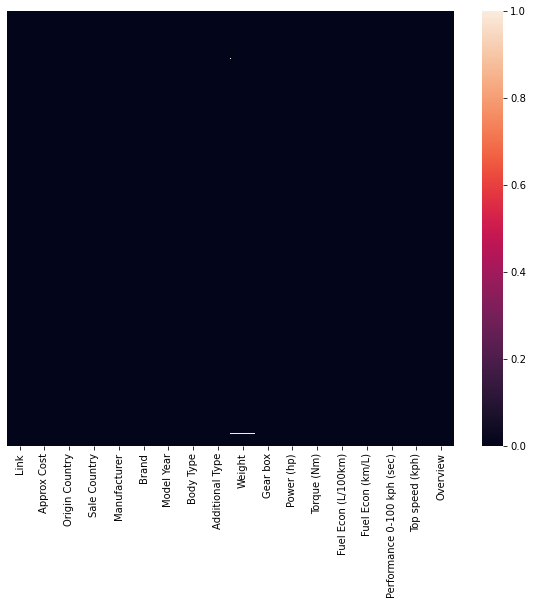

In [31]:
Fig=py.figure(figsize=(10,8))
sns.heatmap(data.isnull(),yticklabels=False)

In [32]:
data.columns

Index(['Link', 'Approx Cost', 'Origin Country', 'Sale Country', 'Manufacturer',
       'Brand', 'Model Year', 'Body Type', 'Additional Type', 'Weight',
       'Gear box', 'Power (hp)', 'Torque (Nm)', 'Fuel Econ (L/100km)',
       'Fuel Econ (km/L)', 'Performance 0-100 kph (sec)', 'Top speed (kph)',
       'Overview'],
      dtype='object')

In [33]:
empty=[col for col in data.columns if data[col].isnull().any()]

In [34]:
empty 

['Origin Country',
 'Additional Type',
 'Weight',
 'Power (hp)',
 'Torque (Nm)',
 'Fuel Econ (L/100km)',
 'Fuel Econ (km/L)',
 'Performance 0-100 kph (sec)']

In [35]:
data[empty]

Origin Country                  Additional Type               Weight  \
0            Germany                     4-door sedan  1730 - \r\n    1920   
1      United States                     5-door wagon                 1973   
2              Japan                4-door/5-door Van          1675 - 1810   
3              Italy               2-door convertible                 1422   
4             Canada              Premium Large Sedan          1797 - 1984   
...              ...                              ...                  ...   
7642         Germany                     4-door sedan          1825 - 1940   
7643   United States                     4-door sedan          1750 - 1948   
7644         Austria                 5-door hatchback          1398 - 1596   
7645  United Kingdom  4-door sedan, 4-door long sedan          1693 - 1990   
7646       Indonesia                   2-door pick-up                 1140   

     Power (hp) Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0           272         350                10.1              9.9   
1           285         352                11.4              8.8   
2           144         213                  12              8.3   
3           610         560                12.3              8.1   
4           485         643                12.5                8   
...         ...         ...                 ...              ...   
7642        320         450                 7.9             12.7   
7643        255         339           11.1-11.5                9   
7644        143         188             8.4-9.8             11.9   
7645        240         340                 8.9             11.2   
7646         91         127                 8.1             12.3   

     Performance 0-100 kph (sec)  
0                              7  
1                            8.1  
2                      14.0-17.0  
3                            3.4  
4                            4.8  
...                          ...  
7642                         5.4  
7643                     7.6-8.6  
7644                   11.1-12.8  
7645                         7.5  
7646                        17.8  

[7647 rows x 8 columns]

In [37]:
data.head(1)

Link          Approx Cost  \
0  https://www.drivearabia.com/carprices/uae/merc...  AED 37,200 - 61,000   

  Origin Country Sale Country   Manufacturer      Brand  Model Year  \
0        Germany          uae  Mercedes-Benz  CLS-Class        2006   

              Body Type Additional Type               Weight Gear box  \
0  Luxury Midsize Sedan    4-door sedan  1730 - \r\n    1920       7A   

  Power (hp) Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0        272         350                10.1              9.9   

  Performance 0-100 kph (sec) Top speed (kph)  \
0                           7            250*   

                                            Overview  
0  The new CLS combines the elegance of a coupÃ© ...

In [39]:
data.columns

Index(['Link', 'Approx Cost', 'Origin Country', 'Sale Country', 'Manufacturer',
       'Brand', 'Model Year', 'Body Type', 'Additional Type', 'Weight',
       'Gear box', 'Power (hp)', 'Torque (Nm)', 'Fuel Econ (L/100km)',
       'Fuel Econ (km/L)', 'Performance 0-100 kph (sec)', 'Top speed (kph)',
       'Overview'],
      dtype='object')

In [46]:
remove_columns=['Link','Sale Country','Overview','Manufacturer','Body Type', 'Additional Type','Brand']

In [49]:
new_data=data.drop(remove_columns,axis=1)

In [48]:
data

Link  \
0     https://www.drivearabia.com/carprices/uae/merc...   
1     https://www.drivearabia.com/carprices/uae/jeep...   
2     https://www.drivearabia.com/carprices/uae/niss...   
3     https://www.drivearabia.com/carprices/uae/lamb...   
4     https://www.drivearabia.com/carprices/uae/dodg...   
...                                                 ...   
7642  https://www.drivearabia.com/carprices/uae/bmw/...   
7643  https://www.drivearabia.com/carprices/uae/cadi...   
7644  https://www.drivearabia.com/carprices/uae/chry...   
7645  https://www.drivearabia.com/carprices/uae/jagu...   
7646  https://www.drivearabia.com/carprices/uae/suzu...   

                              Approx Cost  Origin Country Sale Country  \
0                     AED 37,200 - 61,000         Germany          uae   
1             AED 67,700 - 69,900 (Sport)   United States          uae   
2         AED 22,700 - 24,700 (Panel Van)           Japan          uae   
3                   AED 602,300 - 697,400           Italy          uae   
4     AED 166,400 - 185,600 (SRT HellCat)          Canada          uae   
...                                   ...             ...          ...   
7642         AED 104,600 - 117,900 (640i)         Germany          uae   
7643                  AED 15,700 - 26,100   United States          uae   
7644                    AED 3,900 - 4,300         Austria          uae   
7645      AED 116,700 - 144,100 (2.0L TC)  United Kingdom          uae   
7646                  AED 17,100 - 18,100       Indonesia          uae   

       Manufacturer                Brand  Model Year               Body Type  \
0     Mercedes-Benz            CLS-Class        2006    Luxury Midsize Sedan   
1              Jeep   Wrangler Unlimited        2015             Midsize SUV   
2            Nissan                Urvan        2007  Commercial Midsize Van   
3       Lamborghini       Huracan Spyder        2017    Premium Sports Coupe   
4             Dodge          Charger SRT        2019     Premium Large Sedan   
...             ...                  ...         ...                     ...   
7642            BMW  6-Series Gran Coupe        2014    Luxury Midsize Sedan   
7643       Cadillac                  STS        2006      Luxury Large Sedan   
7644       Chrysler           PT Cruiser        2002         Compact Minivan   
7645         Jaguar                   XJ        2017      Luxury Large Sedan   
7646         Suzuki                Carry        2015          Midsize Pickup   

                      Additional Type               Weight Gear box  \
0                        4-door sedan  1730 - \r\n    1920       7A   
1                        5-door wagon                 1973    6M/5A   
2                   4-door/5-door Van          1675 - 1810       5M   
3                  2-door convertible                 1422      7AM   
4                 Premium Large Sedan          1797 - 1984       8A   
...                               ...                  ...      ...   
7642                     4-door sedan          1825 - 1940       8A   
7643                     4-door sedan          1750 - 1948       5A   
7644                 5-door hatchback          1398 - 1596    5M/4A   
7645  4-door sedan, 4-door long sedan          1693 - 1990       8A   
7646                   2-door pick-up                 1140       5M   

     Power (hp) Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0           272         350                10.1              9.9   
1           285         352                11.4              8.8   
2           144         213                  12              8.3   
3           610         560                12.3              8.1   
4           485         643                12.5                8   
...         ...         ...                 ...              ...   
7642        320         450                 7.9             12.7   
7643        255         339           11.1-11.5                9   
7644        143         188

In [51]:
new_data.head(2)

Approx Cost Origin Country  Model Year  \
0          AED 37,200 - 61,000        Germany        2006   
1  AED 67,700 - 69,900 (Sport)  United States        2015   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  
0              9.9                           7            250*  
1              8.8                         8.1            157*

In [63]:
new_data.shape

(7647, 11)

In [138]:
new_data.head(2)

Approx Cost Origin Country  Model Year  \
0          AED 37,200 - 61,000        Germany        2006   
1  AED 67,700 - 69,900 (Sport)  United States        2015   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   

                   App  
0  [37,200, -, 61,000]  
1  [67,700, -, 69,900]

In [209]:
new_data['Approx Cost'].value_counts()

Not Sold Here                        42
Coming Soon                          21
Not Sold in UAE                      17
Not Sold in UAE.                     12
AED 54,000 - 80,000                  11
                                     ..
AED 81,300 - 85,200 (CTS-V coupe)     1
AED 50,400 - 53,000 (420i)            1
AED 34,200 - 34,500                   1
AED 475,000 - 500,000                 1
AED 187,800 - 204,900                 1
Name: Approx Cost, Length: 6662, dtype: int64

In [222]:
new_data[new_data['Approx Cost']=='Not Sold Here'].index

Int64Index([ 235,  524,  647,  861,  914, 1059, 1431, 1451, 1533, 1538, 1565,
            1644, 1915, 2099, 2130, 2166, 2241, 2285, 2523, 2540, 2672, 3046,
            3076, 3183, 3975, 4069, 4176, 4803, 5502, 5523, 5863, 5877, 5923,
            6793, 6984, 7178, 7187, 7336, 7429, 7445, 7621, 7639],
           dtype='int64')

In [227]:
new_data.drop(index=new_data[new_data['Approx Cost']=='Not Sold Here'].index,inplace=True)

In [229]:
new_data.head(2)

Approx Cost Origin Country  Model Year  \
0          AED 37,200 - 61,000        Germany        2006   
1  AED 67,700 - 69,900 (Sport)  United States        2015   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   

                   App  Appx Cost  
0  [37,200, -, 61,000]    49100.0  
1  [67,700, -, 69,900]    68800.0

In [230]:
new_data['Approx Cost'].value_counts()

Coming Soon                   21
Not Sold in UAE               17
Not Sold in UAE.              12
AED 54,000 - 80,000           11
AED 4,330,000 - 5,078,000     10
                              ..
AED 50,400 - 53,000 (420i)     1
AED 34,200 - 34,500            1
AED 475,000 - 500,000          1
AED 11,200 - 13,300            1
AED 187,800 - 204,900          1
Name: Approx Cost, Length: 6661, dtype: int64

In [233]:
new_data[new_data['Approx Cost']=='Coming Soon'].index

Int64Index([ 144,  430,  635, 1213, 1616, 2036, 2592, 2711, 3051, 4106, 4193,
            4609, 5030, 5038, 5308, 5787, 6202, 6740, 7300, 7476, 7569],
           dtype='int64')

In [235]:
new_data.drop(index=new_data[new_data['Approx Cost']=='Coming Soon'].index,inplace=True)

In [236]:
new_data['Approx Cost'].value_counts()

Not Sold in UAE                      17
Not Sold in UAE.                     12
AED 54,000 - 80,000                  11
AED 4,330,000 - 5,078,000            10
AED 150,000 - 155,000                 9
                                     ..
AED 81,300 - 85,200 (CTS-V coupe)     1
AED 50,400 - 53,000 (420i)            1
AED 34,200 - 34,500                   1
AED 475,000 - 500,000                 1
AED 187,800 - 204,900                 1
Name: Approx Cost, Length: 6660, dtype: int64

In [237]:
new_data[new_data['Approx Cost']=='Not Sold in UAE'].index

Int64Index([ 171,  729,  793, 1246, 1878, 2357, 2612, 3178, 3252, 3658, 4196,
            4816, 4925, 5034, 5856, 5960, 6223],
           dtype='int64')

In [238]:
new_data.drop(index=new_data[new_data['Approx Cost']=='Not Sold in UAE'].index,inplace=True)

In [239]:
new_data.shape

(7567, 13)

In [240]:
new_data['Approx Cost'].value_counts()

Not Sold in UAE.                     12
AED 54,000 - 80,000                  11
AED 4,330,000 - 5,078,000            10
AED 36,000 - 68,000                   9
AED 150,000 - 155,000                 9
                                     ..
AED 81,300 - 85,200 (CTS-V coupe)     1
AED 50,400 - 53,000 (420i)            1
AED 34,200 - 34,500                   1
AED 475,000 - 500,000                 1
AED 187,800 - 204,900                 1
Name: Approx Cost, Length: 6659, dtype: int64

In [241]:
new_data.drop(index=new_data[new_data['Approx Cost']=='Not Sold in UAE.'].index,inplace=True)

In [242]:
new_data['Approx Cost'].value_counts()

AED 54,000 - 80,000                  11
AED 4,330,000 - 5,078,000            10
AED 36,000 - 68,000                   9
AED 150,000 - 155,000                 9
Not sold in UAE                       8
                                     ..
AED 19,600 - 22,600                   1
AED 81,300 - 85,200 (CTS-V coupe)     1
AED 50,400 - 53,000 (420i)            1
AED 34,200 - 34,500                   1
AED 187,800 - 204,900                 1
Name: Approx Cost, Length: 6658, dtype: int64

In [243]:
new_data

Approx Cost  Origin Country  Model Year  \
0                     AED 37,200 - 61,000         Germany        2006   
1             AED 67,700 - 69,900 (Sport)   United States        2015   
2         AED 22,700 - 24,700 (Panel Van)           Japan        2007   
3                   AED 602,300 - 697,400           Italy        2017   
4     AED 166,400 - 185,600 (SRT HellCat)          Canada        2019   
...                                   ...             ...         ...   
7642         AED 104,600 - 117,900 (640i)         Germany        2014   
7643                  AED 15,700 - 26,100   United States        2006   
7644                    AED 3,900 - 4,300         Austria        2002   
7645      AED 116,700 - 144,100 (2.0L TC)  United Kingdom        2017   
7646                  AED 17,100 - 18,100       Indonesia        2015   

                   Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0     1730 - \r\n    1920       7A        272         350                10.1   
1                    1973    6M/5A        285         352                11.4   
2             1675 - 1810       5M        144         213                  12   
3                    1422      7AM        610         560                12.3   
4             1797 - 1984       8A        485         643                12.5   
...                   ...      ...        ...         ...                 ...   
7642          1825 - 1940       8A        320         450                 7.9   
7643          1750 - 1948       5A        255         339           11.1-11.5   
7644          1398 - 1596    5M/4A        143         188             8.4-9.8   
7645          1693 - 1990       8A        240         340                 8.9   
7646                 1140       5M         91         127                 8.1   

     Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0                 9.9                           7            250*   
1                 8.8                         8.1            157*   
2                 8.3                   14.0-17.0             170   
3                 8.1                         3.4             324   
4                   8                         4.8             280   
...               ...                         ...             ...   
7642             12.7                         5.4            250*   
7643                9                     7.6-8.6            200*   
7644             11.9                   11.1-12.8         166-190   
7645             11.2                         7.5             241   
7646             12.3                        17.8             140   

                        App  Appx Cost  
0       [37,200, -, 61,000]    49100.0  
1       [67,700, -, 69,900]    68800.0  
2       [22,700, -, 24,700]    23700.0  
3     [602,300, -, 697,400]   649850.0  
4     [166,400, -, 185,600]   176000.0  
...                     ...        ...  
7642  [104,600, -, 117,900]        NaN  
7643    [15,700, -, 26,100]        NaN  
7644      [3,900, -, 4,300]        NaN  
7645  [116,700, -, 144,100]        NaN  
7646    [17,100, -, 18,100]        NaN  

[7555 rows x 13 columns]

In [248]:
len(new_data['App'])

7555

In [249]:
new_data.head()

Approx Cost Origin Country  Model Year  \
0                  AED 37,200 - 61,000        Germany        2006   
1          AED 67,700 - 69,900 (Sport)  United States        2015   
2      AED 22,700 - 24,700 (Panel Van)          Japan        2007   
3                AED 602,300 - 697,400          Italy        2017   
4  AED 166,400 - 185,600 (SRT HellCat)         Canada        2019   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   
2          1675 - 1810       5M        144         213                  12   
3                 1422      7AM        610         560                12.3   
4          1797 - 1984       8A        485         643                12.5   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   
2              8.3                   14.0-17.0             170   
3              8.1                         3.4             324   
4                8                         4.8             280   

                     App  Appx Cost  
0    [37,200, -, 61,000]    49100.0  
1    [67,700, -, 69,900]    68800.0  
2    [22,700, -, 24,700]    23700.0  
3  [602,300, -, 697,400]   649850.0  
4  [166,400, -, 185,600]   176000.0

In [383]:
new_data.head()

Approx Cost Origin Country  Model Year  \
0                  AED 37,200 - 61,000        Germany        2006   
1          AED 67,700 - 69,900 (Sport)  United States        2015   
2      AED 22,700 - 24,700 (Panel Van)          Japan        2007   
3                AED 602,300 - 697,400          Italy        2017   
4  AED 166,400 - 185,600 (SRT HellCat)         Canada        2019   

                Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0  1730 - \r\n    1920       7A        272         350                10.1   
1                 1973    6M/5A        285         352                11.4   
2          1675 - 1810       5M        144         213                  12   
3                 1422      7AM        610         560                12.3   
4          1797 - 1984       8A        485         643                12.5   

  Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0              9.9                           7            250*   
1              8.8                         8.1            157*   
2              8.3                   14.0-17.0             170   
3              8.1                         3.4             324   
4                8                         4.8             280   

                           App Cost  Appxcost  
0                    [37200, 61000]   37200.0  
1           [67700, 69900, (Sport)]   67700.0  
2      [22700, 24700, (Panel, Van)]   22700.0  
3                  [602300, 697400]  602300.0  
4  [166400, 185600, (SRT, HellCat)]  166400.0

In [300]:
len(new_data)

7555

In [340]:
new_data['Approx Cost'].loc[0].replace('AED','').replace(',','').replace('-','').replace('','').split()

['37200', '61000']

In [312]:
new_data.drop(['App','Appx Cost'],axis=1,inplace=True)

In [343]:
new_data['App Cost']=new_data['Approx Cost'].apply(lambda x:x.replace('AED','').replace(',','').replace('-','').replace('','').split())

In [344]:
new_data['App Cost'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[54000, 80000]                  11
[4330000, 5078000]              10
[150000, 155000]                 9
[36000, 68000]                   9
[995000, 1350000]                8
                                ..
[33100, 33900, (Sport, 4x2)]     1
[53600, 53900]                   1
[85800, 99400]                   1
[76500, 80800]                   1
[28000, 34100]                   1
Name: App Cost, Length: 6658, dtype: int64

In [346]:
new_data

Approx Cost  Origin Country  Model Year  \
0                     AED 37,200 - 61,000         Germany        2006   
1             AED 67,700 - 69,900 (Sport)   United States        2015   
2         AED 22,700 - 24,700 (Panel Van)           Japan        2007   
3                   AED 602,300 - 697,400           Italy        2017   
4     AED 166,400 - 185,600 (SRT HellCat)          Canada        2019   
...                                   ...             ...         ...   
7642         AED 104,600 - 117,900 (640i)         Germany        2014   
7643                  AED 15,700 - 26,100   United States        2006   
7644                    AED 3,900 - 4,300         Austria        2002   
7645      AED 116,700 - 144,100 (2.0L TC)  United Kingdom        2017   
7646                  AED 17,100 - 18,100       Indonesia        2015   

                   Weight Gear box Power (hp) Torque (Nm) Fuel Econ (L/100km)  \
0     1730 - \r\n    1920       7A        272         350                10.1   
1                    1973    6M/5A        285         352                11.4   
2             1675 - 1810       5M        144         213                  12   
3                    1422      7AM        610         560                12.3   
4             1797 - 1984       8A        485         643                12.5   
...                   ...      ...        ...         ...                 ...   
7642          1825 - 1940       8A        320         450                 7.9   
7643          1750 - 1948       5A        255         339           11.1-11.5   
7644          1398 - 1596    5M/4A        143         188             8.4-9.8   
7645          1693 - 1990       8A        240         340                 8.9   
7646                 1140       5M         91         127                 8.1   

     Fuel Econ (km/L) Performance 0-100 kph (sec) Top speed (kph)  \
0                 9.9                           7            250*   
1                 8.8                         8.1            157*   
2                 8.3                   14.0-17.0             170   
3                 8.1                         3.4             324   
4                   8                         4.8             280   
...               ...                         ...             ...   
7642             12.7                         5.4            250*   
7643                9                     7.6-8.6            200*   
7644             11.9                   11.1-12.8         166-190   
7645             11.2                         7.5             241   
7646             12.3                        17.8             140   

                              App Cost  
0                       [37200, 61000]  
1              [67700, 69900, (Sport)]  
2         [22700, 24700, (Panel, Van)]  
3                     [602300, 697400]  
4     [166400, 185600, (SRT, HellCat)]  
...                                ...  
7642          [104600, 117900, (640i)]  
7643                    [15700, 26100]  
7644                      [3900, 4300]  
7645      [116700, 144100, (2.0L, TC)]  
7646                    [17100, 18100]  

[7555 rows x 12 columns]

In [348]:
c=[]
for i in new_data['App Cost']:
    c.append(i)
    print(c)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [349]:
c

[['37200', '61000'],
 ['67700', '69900', '(Sport)'],
 ['22700', '24700', '(Panel', 'Van)'],
 ['602300', '697400'],
 ['166400', '185600', '(SRT', 'HellCat)'],
 ['39600', '41400', '(320i)'],
 ['18400', '20800'],
 ['105500', '118400', '(E200)'],
 ['18500', '22500'],
 ['77200', '80000', '(Cooper)'],
 ['76300', '101700'],
 ['31100', '33200'],
 ['35900', '37200', '(Base)'],
 ['73400', '74000', '(GLX', 'High', 'Line)'],
 ['78900', '79000', '(2.0L', 'Evolve)'],
 ['332100', '365400', '(AMG', 'GT)'],
 ['12500', '14500'],
 ['109700', '114500'],
 ['60200', '60500', '(Sport)'],
 ['44500', '47500', '(hatchback)'],
 ['115300', '117200'],
 ['84900', '86000', '(Elegance', 'plus)'],
 ['68900', '76200', '(E200)'],
 ['14900', '17500'],
 ['160000', '176000', '(X4', '20i)'],
 ['24500', '25800', '(5door)'],
 ['179200', '220600', '(C', '63)'],
 ['260000', '280000', '(xDrive30i)'],
 ['11600', '17600'],
 ['89900', '90000', '(XL)'],
 ['689800', '815200'],
 ['26700', '30300'],
 ['20300', '26000'],
 ['118100', '13

In [368]:
ab=[]
for i in c:
    ab.append(int(i[0]))
    print(ab)

[37200]
[37200, 67700]
[37200, 67700, 22700]
[37200, 67700, 22700, 602300]
[37200, 67700, 22700, 602300, 166400]
[37200, 67700, 22700, 602300, 166400, 39600]
[37200, 67700, 22700, 602300, 166400, 39600, 18400]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300, 31100]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300, 31100, 35900]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300, 31100, 35900, 73400]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300, 31100, 35900, 73400, 78900]
[37200, 67700, 22700, 602300, 166400, 39600, 18400, 105500, 18500, 77200, 76300, 31100, 35900, 73400, 78900, 33210

ValueError: invalid literal for int() with base 10: 'Not'

In [369]:
ab

[37200,
 67700,
 22700,
 602300,
 166400,
 39600,
 18400,
 105500,
 18500,
 77200,
 76300,
 31100,
 35900,
 73400,
 78900,
 332100,
 12500,
 109700,
 60200,
 44500,
 115300,
 84900,
 68900,
 14900,
 160000,
 24500,
 179200,
 260000,
 11600,
 89900,
 689800,
 26700,
 20300,
 118100,
 17900,
 13000,
 119000,
 2500,
 47800,
 417700,
 65100,
 11200,
 22700,
 65300,
 39400,
 3600,
 50800,
 3300,
 184000,
 22600,
 120000,
 47900,
 25000,
 44600,
 70000,
 18100,
 47800,
 63600,
 33200,
 92000,
 15700,
 119900,
 139600,
 24900,
 29100,
 5800,
 25600,
 17500,
 31500,
 145950,
 76500,
 180600,
 41400,
 97300,
 999000,
 19800,
 95285,
 5500,
 78500,
 157000,
 86700,
 26800,
 315000,
 850000,
 40400,
 14400,
 71400,
 442800,
 304400,
 195000,
 60300,
 33200,
 8100,
 213200,
 24000,
 31200,
 257250,
 99000,
 117500,
 42000,
 16900,
 17000,
 253000,
 36600,
 1600000,
 73200,
 1300000,
 56800,
 236600,
 14800,
 59500,
 6800,
 69900,
 23400,
 298900,
 15700,
 140000,
 165000,
 26600,
 647800,
 62300,


In [373]:
ac=[]
for i in c:
    ac.append(i[1])
    print(ac)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['61000', '69900', '24700', '697400', '185600', '41400', '20800', '118400', '22500', '80000', '101700', '33200', '37200', '74000', '79000', '365400', '14500', '114500', '60500', '47500', '117200', '86000', '76200', '17500', '176000', '25800', '220600', '280000', '17600', '90000', '815200', '30300', '26000', '131200', '20100', '15300', '123300', '3300', '57200', '491300', '68500', '14000', '23600', '65700', '58900', '4500', '61100', '5800', '192000', '26700', '130000', '48000', '27000', '49100', '100000', '20700', '55600', '90000', '35600', '95000', '20500', '120000', '140000', '27700', '39300', '8200', '34100', '28000', '35500', '146000', '80000', '210900', '42700', '135700', '1200000', '21700', '100000', '5800', '111700', '170800', '87000', '27700', '320000', '1000000', '53000', '15000', '86600', '516600', '312500', '220000', '72800', '33800', '8800', '278800', '31200', '32400', '260000', '200000', '123200', '48900', '22500', '20100', '260000', '40100', '1750000', '82400', '1500000',

In [380]:
ab

[37200,
 67700,
 22700,
 602300,
 166400,
 39600,
 18400,
 105500,
 18500,
 77200,
 76300,
 31100,
 35900,
 73400,
 78900,
 332100,
 12500,
 109700,
 60200,
 44500,
 115300,
 84900,
 68900,
 14900,
 160000,
 24500,
 179200,
 260000,
 11600,
 89900,
 689800,
 26700,
 20300,
 118100,
 17900,
 13000,
 119000,
 2500,
 47800,
 417700,
 65100,
 11200,
 22700,
 65300,
 39400,
 3600,
 50800,
 3300,
 184000,
 22600,
 120000,
 47900,
 25000,
 44600,
 70000,
 18100,
 47800,
 63600,
 33200,
 92000,
 15700,
 119900,
 139600,
 24900,
 29100,
 5800,
 25600,
 17500,
 31500,
 145950,
 76500,
 180600,
 41400,
 97300,
 999000,
 19800,
 95285,
 5500,
 78500,
 157000,
 86700,
 26800,
 315000,
 850000,
 40400,
 14400,
 71400,
 442800,
 304400,
 195000,
 60300,
 33200,
 8100,
 213200,
 24000,
 31200,
 257250,
 99000,
 117500,
 42000,
 16900,
 17000,
 253000,
 36600,
 1600000,
 73200,
 1300000,
 56800,
 236600,
 14800,
 59500,
 6800,
 69900,
 23400,
 298900,
 15700,
 140000,
 165000,
 26600,
 647800,
 62300,


In [381]:
new_data['Appxcost']=pd.DataFrame(ab)

In [385]:
new_data.drop(['Approx Cost','App Cost'],axis=1,inplace=True,)

In [387]:
new_data['Appxcost'].mean()

118268.4857142857

In [390]:
new_data['Appxcost'].fillna(value=new_data['Appxcost'].mean(),inplace=True)

In [391]:
new_data

Origin Country  Model Year               Weight Gear box Power (hp)  \
0            Germany        2006  1730 - \r\n    1920       7A        272   
1      United States        2015                 1973    6M/5A        285   
2              Japan        2007          1675 - 1810       5M        144   
3              Italy        2017                 1422      7AM        610   
4             Canada        2019          1797 - 1984       8A        485   
...              ...         ...                  ...      ...        ...   
7642         Germany        2014          1825 - 1940       8A        320   
7643   United States        2006          1750 - 1948       5A        255   
7644         Austria        2002          1398 - 1596    5M/4A        143   
7645  United Kingdom        2017          1693 - 1990       8A        240   
7646       Indonesia        2015                 1140       5M         91   

     Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0            350                10.1              9.9   
1            352                11.4              8.8   
2            213                  12              8.3   
3            560                12.3              8.1   
4            643                12.5                8   
...          ...                 ...              ...   
7642         450                 7.9             12.7   
7643         339           11.1-11.5                9   
7644         188             8.4-9.8             11.9   
7645         340                 8.9             11.2   
7646         127                 8.1             12.3   

     Performance 0-100 kph (sec) Top speed (kph)       Appxcost  
0                              7            250*   37200.000000  
1                            8.1            157*   67700.000000  
2                      14.0-17.0             170   22700.000000  
3                            3.4             324  602300.000000  
4                            4.8             280  166400.000000  
...                          ...             ...            ...  
7642                         5.4            250*  118268.485714  
7643                     7.6-8.6            200*  118268.485714  
7644                   11.1-12.8         166-190  118268.485714  
7645                         7.5             241  118268.485714  
7646                        17.8             140  118268.485714  

[7555 rows x 11 columns]

In [436]:
for i in new_data['Top speed (kph)']:
    print(i)

250*
157*
170
324
280
226
160
240
208*
210
250*
241
173*
200
210
304*
200*
220*
253*
170-171
250*
210
233
176-186
220
197
250*
240
180
200
330
227*
205-210

207
172
216
210
160-165
225
295
236
200
185
181*
189
200
250*
140
226
195
210
185
200*
229
200*
191
227
240
181
160
180
235
146
249
210*
180
200
170
170
210
185
250
230
180*
340
180
180
185
250*
263
185
240
250*
308
180
150-165
205
210
250*
230
198-204
192*
149
250*
172*
172*
250
200-210
240
250
172*
175
250

220
354
223
340
180*
331
181
200
182
190
160
304*
154-157
210
205
190
220*
207*
175
296
250*
160
175
195

246
315
184
250*
175
250*
207
200
170
149
180
250*
340
248
157*
180
225
210-226
224*
208
160
185
197*
130
200
185
190*
180
200*
220*
208*
225
200*
223
200
190
192
170
190
250*
219
228
180
193
200*
212
328
250*
140
195
180
290
185
218
250
250*
210
155
222
187
194*
210
328
250*
250*
170
210*
170-180
214
206-211
210
180
210
185
220-223
180
180
320
180*
170-165
240
150-160
172*
177
215
177
250*
150
200*
188
240
170
240
180
219

180
190
208*
180
180
240
226
150-160
175
206
200-210
202
215
170
250*
191-203
208*
177
170-180
228
250*
191-203
200
340
170-180
165-169
210
250
180
200
250*
240
175
200
250*
180
241
274*
180
240
216
275
180
170-180
180
300
208
200*
205
250*
250
250*
280
225
250*
183-185
250*
165
155
250*
280
219
200-210
250-305
250*
240-242
208*
184
210
250*
200
195*
250
180
250
210
317*
200
170-178
171
200-210
250-255
180
195
180
187
250*
340
170-176
181
184
223
185
186
207
180*
181
185-186
274
304*
340
170
249
225*
250*
181*
160
170-180
188
191-203
199
250*
260
200*
170
190
219
250
150
220
245
301
172*
180
172
354
208
210
158
211
160
198
200
330
150-154
170-180
233
165
250*
250*
250
241
180*
264-266
173*
160
219
270
160
188-214
240
221
200*
315
240
230
222
170
160-170
304*
160-170
208*
194
245*
154-157
180
208*
180*
175
250*
250*
157
190*
250*
250*
250*
335
250*
241
295
280-305
190
192
170
165
210
180*
170
320
260
190
192
229-234
270
247
250*
200*
230
172
250*
197
250*
155
235
210
238
250*
250*
172*


189
175
280-285
160*
248
200*
230
181-190
200
150-160
189
250*
150
185
180*
250*
180
320
190*
185
200
210-226
250*
200
200*
250*
395
184
180
248
190*
300
187
180
190
180
272
180
251
250*
231
190
170
181-190
240
354
170-180
175
163
180*
200
181*
175*
222
238
180
201
200
157*
240*
250*
200
172*
200
250*
192
197
220
301
220
170-178
220
250*
250*
168-172
140
300
180
240
175-180
250*
339
247
167
250*
215
250*
176-186
170-175
171
250*
237
176-186
230
170
250*
250*
240*
380
170
250*
250*
185
188
175-179
172*
185
170
240
225*
240
230
192*
190
190*
205-210
169
240
282-307
177
170
407
250
171-175
175
210*
370
176*
250*
220
250*
154-157
150
170
230
280-305
240
250*
220
250*
238
250*
250*
170
225
250*
150
250*
250-255
203
187*
150-155
215-220
250*
216
190
210
199
226
250
407
170
166-169
240
272
210
220
275
315
180*
225
135-140
200*
170
220-223
165
320
183
180
200*
208*
195
190
250*
142-152
325
163
180*
250*
190
165
220
210
160*
315
240
333
250*
184
188
180
180
240
238
175-180
197
170
274
205
200
1

250*
170-180
320
217
199
240-242
187*
170
250*
334
194-205
184
250*
80
198
250*
189-198
177
203
219
210
250*
180*
160
250*
170-180
160
320*
170
250*
240
180
180
160-170
250*
210
354
220
232*
210
250*
215
200*
280
240
198-203
140
222
180
240
176-179
180
320
236
180*
180
219*
212
304
200
170
340
291
208
233
170
176-179
315
317*
228
250*
225
175*
250
240
167-176
204-214
230
200
170
170-180
170
222
180
170-180
172*
180
161
220*
200
170
185
160*
140-150
214
165
172*
167
180*
186
320
240
282-307
185
134-144
210
185
232*
154-157
183
250*
180*
134-144
179
186
354
171-174
182-200
192*
250*
215-220
212*
170
180
180
285
185
240
231
183
214-224
190
178*
318-320
192*
250*
180
120
165
142
155
250*
177
182
220
170
186
165-175
190*
283
200
160-170
160
142
184
250*
244
190-195
170
250*
180
177
180
185
170
241
274
171-175
207
250*
180
160
250*
157*
170
194
180
200*
315
208*
190*
312
236
188
250*
250*
250*
200*
140
240
150
190*
166
230
185
170
205
170-180
180
170*
229-234
198-203
185*
150
200*
190-198
22

In [442]:
new_data['Top speed (kph)'].loc[0].replace('*','')

'250'

In [443]:
new_data['Top speed (kph)']=new_data['Top speed (kph)'].apply(lambda x:x.replace('*',''))

In [445]:
new_data['Top speed (kph)']=new_data['Top speed (kph)'].apply(lambda x:x.split('-')[0])

In [453]:
new_data['Top speed (kph)']=new_data['Top speed (kph)'].apply(lambda x:x.split('.')[0])

In [454]:
new_data['Top speed (kph)']=new_data['Top speed (kph)'].apply(lambda x:int(x))

In [455]:
new_data

Origin Country  Model Year               Weight Gear box Power (hp)  \
0            Germany        2006  1730 - \r\n    1920       7A        272   
1      United States        2015                 1973    6M/5A        285   
2              Japan        2007          1675 - 1810       5M        144   
3              Italy        2017                 1422      7AM        610   
4             Canada        2019          1797 - 1984       8A        485   
...              ...         ...                  ...      ...        ...   
7642         Germany        2014          1825 - 1940       8A        320   
7643   United States        2006          1750 - 1948       5A        255   
7644         Austria        2002          1398 - 1596    5M/4A        143   
7645  United Kingdom        2017          1693 - 1990       8A        240   
7646       Indonesia        2015                 1140       5M         91   

     Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0            350                10.1              9.9   
1            352                11.4              8.8   
2            213                  12              8.3   
3            560                12.3              8.1   
4            643                12.5                8   
...          ...                 ...              ...   
7642         450                 7.9             12.7   
7643         339           11.1-11.5                9   
7644         188             8.4-9.8             11.9   
7645         340                 8.9             11.2   
7646         127                 8.1             12.3   

     Performance 0-100 kph (sec)  Top speed (kph)       Appxcost  
0                              7              250   37200.000000  
1                            8.1              157   67700.000000  
2                      14.0-17.0              170   22700.000000  
3                            3.4              324  602300.000000  
4                            4.8              280  166400.000000  
...                          ...              ...            ...  
7642                         5.4              250  118268.485714  
7643                     7.6-8.6              200  118268.485714  
7644                   11.1-12.8              166  118268.485714  
7645                         7.5              241  118268.485714  
7646                        17.8              140  118268.485714  

[7555 rows x 11 columns]

In [456]:
new_data['Performance 0-100 kph (sec)']=new_data['Performance 0-100 kph (sec)'].apply(lambda x:x.split('-')[0])

In [457]:
new_data['Performance 0-100 kph (sec)']=new_data['Performance 0-100 kph (sec)'].apply(lambda x:x.split('.')[0])

In [460]:
new_data['Performance 0-100 kph (sec)']=new_data['Performance 0-100 kph (sec)'].apply(lambda x:x.replace('',''))

In [461]:
new_data['Performance 0-100 kph (sec)']=new_data['Performance 0-100 kph (sec)'].apply(lambda x:int(x))

ValueError: invalid literal for int() with base 10: ''

In [462]:
new_data


Origin Country  Model Year               Weight Gear box Power (hp)  \
0            Germany        2006  1730 - \r\n    1920       7A        272   
1      United States        2015                 1973    6M/5A        285   
2              Japan        2007          1675 - 1810       5M        144   
3              Italy        2017                 1422      7AM        610   
4             Canada        2019          1797 - 1984       8A        485   
...              ...         ...                  ...      ...        ...   
7642         Germany        2014          1825 - 1940       8A        320   
7643   United States        2006          1750 - 1948       5A        255   
7644         Austria        2002          1398 - 1596    5M/4A        143   
7645  United Kingdom        2017          1693 - 1990       8A        240   
7646       Indonesia        2015                 1140       5M         91   

     Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0            350                10.1              9.9   
1            352                11.4              8.8   
2            213                  12              8.3   
3            560                12.3              8.1   
4            643                12.5                8   
...          ...                 ...              ...   
7642         450                 7.9             12.7   
7643         339           11.1-11.5                9   
7644         188             8.4-9.8             11.9   
7645         340                 8.9             11.2   
7646         127                 8.1             12.3   

     Performance 0-100 kph (sec)  Top speed (kph)       Appxcost  
0                              7              250   37200.000000  
1                              8              157   67700.000000  
2                             14              170   22700.000000  
3                              3              324  602300.000000  
4                              4              280  166400.000000  
...                          ...              ...            ...  
7642                           5              250  118268.485714  
7643                           7              200  118268.485714  
7644                          11              166  118268.485714  
7645                           7              241  118268.485714  
7646                          17              140  118268.485714  

[7555 rows x 11 columns]

In [464]:
p=[]
for i in new_data['Performance 0-100 kph (sec)']:
    p.append (i)
    print(p)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [466]:
for i in p:
    print(int(i))

7
8
14
3
4
9
15
7
7
7
4
6
9
9
9
4
9
7
5
12
4
10
7
10
8
11
4
8
10
11
3
5
9
7
11
9
7
12
8
5
7
9
11
5
9
9
6
13
6
9
8
10
8
7
9
12
8
7
8
14
10
7
7
6
8
13
9
15
11
7
10
5
7
7
2
10
10
11
6
5
9
7


ValueError: invalid literal for int() with base 10: ''

In [467]:
p

['7',
 '8',
 '14',
 '3',
 '4',
 '9',
 '15',
 '7',
 '7',
 '7',
 '4',
 '6',
 '9',
 '9',
 '9',
 '4',
 '9',
 '7',
 '5',
 '12',
 '4',
 '10',
 '7',
 '10',
 '8',
 '11',
 '4',
 '8',
 '10',
 '11',
 '3',
 '5',
 '9',
 '\r\n7',
 '11',
 '9',
 '7',
 '12',
 '8',
 '5',
 '7',
 '9',
 '11',
 '5',
 '9',
 '9',
 '6',
 '13',
 '6',
 '9',
 '8',
 '10',
 '8',
 '7',
 '9',
 '12',
 '8',
 '7',
 '8',
 '14',
 '10',
 '7',
 '7',
 '6',
 '8',
 '13',
 '9',
 '15',
 '11',
 '7',
 '10',
 '5',
 '7',
 '7',
 '2',
 '10',
 '10',
 '11',
 '6',
 '5',
 '9',
 '7',
 '',
 '4',
 '12',
 '12',
 '10',
 '5',
 '4',
 '7',
 '9',
 '7',
 '14',
 '4',
 '9',
 '8',
 '5',
 '9',
 '7',
 '6',
 '8',
 '15',
 '6',
 '9',
 '2',
 '8',
 '2',
 '8',
 '3',
 '11',
 '9',
 '13',
 '10',
 '10',
 '4',
 '17',
 '6',
 '10',
 '11',
 '4',
 '6',
 '15',
 '5',
 '4',
 '14',
 '12',
 '10',
 '6',
 '3',
 '11',
 '5',
 '11',
 '5',
 '8',
 '8',
 '11',
 '14',
 '13',
 '7',
 '2',
 '7',
 '7',
 '12',
 '8',
 '7',
 '7',
 '9',
 '16',
 '11',
 '9',
 '19',
 '10',
 '11',
 '8',
 '12',
 '7',
 '7',
 '11

In [469]:
new_data.to_csv('datacleaning_1.csv',index=False,index_label=False)

In [470]:
cdf=pd.read_csv('datacleaning_1.csv')

In [471]:
cdf.head()

Origin Country  Model Year               Weight Gear box  Power (hp)  \
0        Germany        2006  1730 - \r\n    1920       7A         272   
1  United States        2015                 1973    6M/5A         285   
2          Japan        2007          1675 - 1810       5M         144   
3          Italy        2017                 1422      7AM         610   
4         Canada        2019          1797 - 1984       8A         485   

  Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0         350                10.1              9.9   
1         352                11.4              8.8   
2         213                  12              8.3   
3         560                12.3              8.1   
4         643                12.5                8   

   Performance 0-100 kph (sec)  Top speed (kph)  Appxcost  
0                          7.0              250   37200.0  
1                          8.0              157   67700.0  
2                         14.0              170   22700.0  
3                          3.0              324  602300.0  
4                          4.0              280  166400.0

In [472]:
cdf['Performance 0-100 kph (sec)'].value_counts()

9.0     843
8.0     825
7.0     772
11.0    747
10.0    736
4.0     649
6.0     638
5.0     533
12.0    504
3.0     340
13.0    305
14.0    264
15.0    130
2.0      90
17.0     59
16.0     47
20.0     40
18.0     17
19.0      4
Name: Performance 0-100 kph (sec), dtype: int64

In [484]:
 type((cdf['Performance 0-100 kph (sec)'].loc[0]))

numpy.float64

In [494]:
check=[]
for i in cdf['Performance 0-100 kph (sec)']:
    if type(i) != type((cdf['Performance 0-100 kph (sec)'].loc[0])):
        
        check.append(i)
    print(check)

[7.0]
[7.0, 8.0]
[7.0, 8.0, 14.0]
[7.0, 8.0, 14.0, 3.0]
[7.0, 8.0, 14.0, 3.0, 4.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0, 4.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0, 4.0, 9.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0, 4.0, 9.0, 7.0]
[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0, 4.0, 9.0, 7.0, 5.0]
[

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[7.0, 8.0, 14.0, 3.0, 4.0, 9.0, 15.0, 7.0, 7.0, 7.0, 4.0, 6.0, 9.0, 9.0, 9.0, 4.0, 9.0, 7.0, 5.0, 12.0, 4.0, 10.0, 7.0, 10.0, 8.0, 11.0, 4.0, 8.0, 10.0, 11.0, 3.0, 5.0, 9.0, 7.0, 11.0, 9.0, 7.0, 12.0, 8.0, 5.0, 7.0, 9.0, 11.0, 5.0, 9.0, 9.0, 6.0, 13.0, 6.0, 9.0, 8.0, 10.0, 8.0, 7.0, 9.0, 12.0, 8.0, 7.0, 8.0, 14.0, 10.0, 7.0, 7.0, 6.0, 8.0, 13.0, 9.0, 15.0, 11.0, 7.0, 10.0, 5.0, 7.0, 7.0, 2.0, 10.0, 10.0, 11.0, 6.0, 5.0, 9.0, 7.0, nan, 4.0, 12.0, 12.0, 10.0, 5.0, 4.0, 7.0, 9.0, 7.0, 14.0, 4.0, 9.0, 8.0, 5.0, 9.0, 7.0, 6.0, 8.0, 15.0, 6.0, 9.0, 2.0, 8.0, 2.0, 8.0, 3.0, 11.0, 9.0, 13.0, 10.0, 10.0, 4.0, 17.0, 6.0, 10.0, 11.0, 4.0, 6.0, 15.0, 5.0, 4.0, 14.0, 12.0, 10.0, 6.0, 3.0, 11.0, 5.0, 11.0, 5.0, 8.0, 8.0, 11.0, 14.0, 13.0, 7.0, 2.0, 7.0, 7.0, 12.0, 8.0, 7.0, 7.0, 9.0, 16.0, 11.0, 9.0, 19.0, 10.0, 11.0, 8.0, 12.0, 7.0, 7.0, 11.0, 9.0, 8.0, 8.0, 11.0, 9.0, 10.0, 12.0, 9.0, 4.0, 8.0, 7.0, 11.0, 12.0, 10.0, 8.0, 3.0, 6.0, 15.0, 9.0, 11.0, 4.0, 8.0, 8.0, 5.0, 5.0, 9.0, 14.0, 7.0, 11.0, 9

In [497]:
cdf.head()

Origin Country  Model Year               Weight Gear box  Power (hp)  \
0        Germany        2006  1730 - \r\n    1920       7A         272   
1  United States        2015                 1973    6M/5A         285   
2          Japan        2007          1675 - 1810       5M         144   
3          Italy        2017                 1422      7AM         610   
4         Canada        2019          1797 - 1984       8A         485   

  Torque (Nm) Fuel Econ (L/100km) Fuel Econ (km/L)  \
0         350                10.1              9.9   
1         352                11.4              8.8   
2         213                  12              8.3   
3         560                12.3              8.1   
4         643                12.5                8   

   Performance 0-100 kph (sec)  Top speed (kph)  Appxcost  
0                          7.0              250   37200.0  
1                          8.0              157   67700.0  
2                         14.0              170   22700.0  
3                          3.0              324  602300.0  
4                          4.0              280  166400.0

In [504]:
cdf.dropna(inplace=True)

In [512]:
cdf['Fuel Econ (km/L)'].loc[0][0]

'9'

In [513]:
cdf['Fuel Econ (km/L)']=cdf['Fuel Econ (km/L)'].apply(lambda x : x[0])

In [533]:
cdf[cdf['Fuel Econ (km/L)']=='-']=0

In [538]:
cdf['Fuel Econ (km/L)']=cdf['Fuel Econ (km/L)'].apply(lambda x : int(x))

In [539]:
cdf['Fuel Econ (km/L)'].mean()

11.277725752508362

In [542]:
cdf[cdf['Fuel Econ (km/L)']==0]=cdf['Fuel Econ (km/L)'].mean()

In [543]:
cdf

Origin Country  Model Year               Weight Gear box  Power (hp)  \
0            Germany      2006.0  1730 - \r\n    1920       7A       272.0   
1      United States      2015.0                 1973    6M/5A       285.0   
2              Japan      2007.0          1675 - 1810       5M       144.0   
3              Italy      2017.0                 1422      7AM       610.0   
4             Canada      2019.0          1797 - 1984       8A       485.0   
...              ...         ...                  ...      ...         ...   
7550         Germany      2014.0          1825 - 1940       8A       320.0   
7551   United States      2006.0          1750 - 1948       5A       255.0   
7552         Austria      2002.0          1398 - 1596    5M/4A       143.0   
7553  United Kingdom      2017.0          1693 - 1990       8A       240.0   
7554       Indonesia      2015.0                 1140       5M        91.0   

     Torque (Nm) Fuel Econ (L/100km)  Fuel Econ (km/L)  \
0            350                10.1               9.0   
1            352                11.4               8.0   
2            213                  12               8.0   
3            560                12.3               8.0   
4            643                12.5               8.0   
...          ...                 ...               ...   
7550         450                 7.9              12.0   
7551         339           11.1-11.5               9.0   
7552         188             8.4-9.8              11.0   
7553         340                 8.9              11.0   
7554         127                 8.1              12.0   

      Performance 0-100 kph (sec)  Top speed (kph)       Appxcost  
0                             7.0            250.0   37200.000000  
1                             8.0            157.0   67700.000000  
2                            14.0            170.0   22700.000000  
3                             3.0            324.0  602300.000000  
4                             4.0            280.0  166400.000000  
...                           ...              ...            ...  
7550                          5.0            250.0  118268.485714  
7551                          7.0            200.0  118268.485714  
7552                         11.0            166.0  118268.485714  
7553                          7.0            241.0  118268.485714  
7554                         17.0            140.0  118268.485714  

[7475 rows x 11 columns]

In [562]:
cdf['Torque (Nm)'].value_counts()

350    212
320    169
250    168
400    148
240    140
      ... 
89       2
328      2
0        2
748      1
445      1
Name: Torque (Nm), Length: 366, dtype: int64

In [559]:
cdf[cdf['Torque (Nm)']=='\r\n650']=0

In [564]:
cdf[cdf['Torque (Nm)']=='\r\n320']=0

In [565]:
cdf[cdf['Torque (Nm)']=='450.\r\n450']=0

In [566]:
cdf['Torque (Nm)']=cdf['Torque (Nm)'].apply(lambda x:int(x))

In [567]:
cdf['Torque (Nm)'].mean()

331.3844816053512

In [570]:
cdf[cdf['Torque (Nm)']==0].index

Int64Index([33, 1938, 2319, 5194], dtype='int64')

In [571]:
cdf.drop(index=cdf[cdf['Torque (Nm)']==0].index,inplace=True)

In [572]:
cdf

Origin Country  Model Year               Weight Gear box  Power (hp)  \
0            Germany      2006.0  1730 - \r\n    1920       7A       272.0   
1      United States      2015.0                 1973    6M/5A       285.0   
2              Japan      2007.0          1675 - 1810       5M       144.0   
3              Italy      2017.0                 1422      7AM       610.0   
4             Canada      2019.0          1797 - 1984       8A       485.0   
...              ...         ...                  ...      ...         ...   
7550         Germany      2014.0          1825 - 1940       8A       320.0   
7551   United States      2006.0          1750 - 1948       5A       255.0   
7552         Austria      2002.0          1398 - 1596    5M/4A       143.0   
7553  United Kingdom      2017.0          1693 - 1990       8A       240.0   
7554       Indonesia      2015.0                 1140       5M        91.0   

      Torque (Nm) Fuel Econ (L/100km)  Fuel Econ (km/L)  \
0             350                10.1               9.0   
1             352                11.4               8.0   
2             213                  12               8.0   
3             560                12.3               8.0   
4             643                12.5               8.0   
...           ...                 ...               ...   
7550          450                 7.9              12.0   
7551          339           11.1-11.5               9.0   
7552          188             8.4-9.8              11.0   
7553          340                 8.9              11.0   
7554          127                 8.1              12.0   

      Performance 0-100 kph (sec)  Top speed (kph)       Appxcost  
0                             7.0            250.0   37200.000000  
1                             8.0            157.0   67700.000000  
2                            14.0            170.0   22700.000000  
3                             3.0            324.0  602300.000000  
4                             4.0            280.0  166400.000000  
...                           ...              ...            ...  
7550                          5.0            250.0  118268.485714  
7551                          7.0            200.0  118268.485714  
7552                         11.0            166.0  118268.485714  
7553                          7.0            241.0  118268.485714  
7554                         17.0            140.0  118268.485714  

[7471 rows x 11 columns]

In [577]:
cdf.drop(['Origin Country','Gear box'],axis=1,inplace=True)

In [578]:
cdf

Model Year               Weight  Power (hp)  Torque (Nm)  \
0         2006.0  1730 - \r\n    1920       272.0          350   
1         2015.0                 1973       285.0          352   
2         2007.0          1675 - 1810       144.0          213   
3         2017.0                 1422       610.0          560   
4         2019.0          1797 - 1984       485.0          643   
...          ...                  ...         ...          ...   
7550      2014.0          1825 - 1940       320.0          450   
7551      2006.0          1750 - 1948       255.0          339   
7552      2002.0          1398 - 1596       143.0          188   
7553      2017.0          1693 - 1990       240.0          340   
7554      2015.0                 1140        91.0          127   

     Fuel Econ (L/100km)  Fuel Econ (km/L)  Performance 0-100 kph (sec)  \
0                   10.1               9.0                          7.0   
1                   11.4               8.0                          8.0   
2                     12               8.0                         14.0   
3                   12.3               8.0                          3.0   
4                   12.5               8.0                          4.0   
...                  ...               ...                          ...   
7550                 7.9              12.0                          5.0   
7551           11.1-11.5               9.0                          7.0   
7552             8.4-9.8              11.0                         11.0   
7553                 8.9              11.0                          7.0   
7554                 8.1              12.0                         17.0   

      Top speed (kph)       Appxcost  
0               250.0   37200.000000  
1               157.0   67700.000000  
2               170.0   22700.000000  
3               324.0  602300.000000  
4               280.0  166400.000000  
...               ...            ...  
7550            250.0  118268.485714  
7551            200.0  118268.485714  
7552            166.0  118268.485714  
7553            241.0  118268.485714  
7554            140.0  118268.485714  

[7471 rows x 9 columns]

In [580]:
cdf['Power (hp)'].mean()

244.87623969426483

In [582]:
cdf['Fuel Econ (L/100km)'].value_counts()

6.5          131
7            121
7.5          113
7.8          108
7.9          107
            ... 
8.5-9.2        2
8.8-9.3        2
13.8-14.7      2
9.5-10.5       1
1.7            1
Name: Fuel Econ (L/100km), Length: 405, dtype: int64

In [585]:
cdf[cdf['Fuel Econ (L/100km)']=='8.5-9.2']=8.5

In [586]:
cdf['Fuel Econ (L/100km)'].value_counts()

6.5         131
7           121
7.5         113
7.8         108
7.9         107
           ... 
7.0-7.7       2
8.5           2
16.3          2
1.7           1
9.5-10.5      1
Name: Fuel Econ (L/100km), Length: 405, dtype: int64

In [588]:
cdf[cdf['Fuel Econ (L/100km)']=='8.8-9.3']=8.8

In [591]:
cdf[cdf['Fuel Econ (L/100km)']=='13.8-14.7']=13.8

In [593]:
cdf[cdf['Fuel Econ (L/100km)']=='9.5-10.5']=9.5

In [600]:
cdf['Fuel Econ (L/100km)'].loc[0]

'10.1'

In [607]:
ch=[]
for i in cdf['Fuel Econ (L/100km)']:
    if type(i)==float:
        ch.append(i)
        print(ch)

[11.277725752508362]
[11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 8.5]
[11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.277725752508362, 11.27

In [610]:
ch

[11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 8.5,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 8.5,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 8.8,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 9.5,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 13.8,
 11.277725752508362,
 13.8,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 11.277725752508362,
 8.8,
 11.277725752508362]

In [620]:
cdf[cdf['Fuel Econ (L/100km)']==11.277725752508362]

Model Year   Weight  Power (hp)  Torque (Nm) Fuel Econ (L/100km)  \
62     11.277726  11.2777   11.277726         11.0             11.2777   
481    11.277726  11.2777   11.277726         11.0             11.2777   
679    11.277726  11.2777   11.277726         11.0             11.2777   
904    11.277726  11.2777   11.277726         11.0             11.2777   
1063   11.277726  11.2777   11.277726         11.0             11.2777   
1228   11.277726  11.2777   11.277726         11.0             11.2777   
1285   11.277726  11.2777   11.277726         11.0             11.2777   
1322   11.277726  11.2777   11.277726         11.0             11.2777   
1910   11.277726  11.2777   11.277726         11.0             11.2777   
2091   11.277726  11.2777   11.277726         11.0             11.2777   
2145   11.277726  11.2777   11.277726         11.0             11.2777   
2237   11.277726  11.2777   11.277726         11.0             11.2777   
2344   11.277726  11.2777   11.277726         11.0             11.2777   
2813   11.277726  11.2777   11.277726         11.0             11.2777   
2832   11.277726  11.2777   11.277726         11.0             11.2777   
2909   11.277726  11.2777   11.277726         11.0             11.2777   
3024   11.277726  11.2777   11.277726         11.0             11.2777   
3363   11.277726  11.2777   11.277726         11.0             11.2777   
3485   11.277726  11.2777   11.277726         11.0             11.2777   
3595   11.277726  11.2777   11.277726         11.0             11.2777   
3716   11.277726  11.2777   11.277726         11.0             11.2777   
3759   11.277726  11.2777   11.277726         11.0             11.2777   
4153   11.277726  11.2777   11.277726         11.0             11.2777   
4182   11.277726  11.2777   11.277726         11.0             11.2777   
4254   11.277726  11.2777   11.277726         11.0             11.2777   
4514   11.277726  11.2777   11.277726         11.0             11.2777   
4601   11.277726  11.2777   11.277726         11.0             11.2777   
4628   11.277726  11.2777   11.277726         11.0             11.2777   
4639   11.277726  11.2777   11.277726         11.0             11.2777   
4685   11.277726  11.2777   11.277726         11.0             11.2777   
4813   11.277726  11.2777   11.277726         11.0             11.2777   
4893   11.277726  11.2777   11.277726         11.0             11.2777   
4984   11.277726  11.2777   11.277726         11.0             11.2777   
5276   11.277726  11.2777   11.277726         11.0             11.2777   
5416   11.277726  11.2777   11.277726         11.0             11.2777   
5813   11.277726  11.2777   11.277726         11.0             11.2777   
6332   11.277726  11.2777   11.277726         11.0             11.2777   
6350   11.277726  11.2777   11.277726         11.0             11.2777   
6731   11.277726  11.2777   11.277726         11.0             11.2777   
7138   11.277726  11.2777   11.277726         11.0             11.2777   
7328   11.277726  11.2777   11.277726         11.0             11.2777   

      Fuel Econ (km/L)  Performance 0-100 kph (sec)  Top speed (kph)  \
62           11.277726                    11.277726        11.277726   
481          11.277726                    11.277726        11.277726   
679          11.277726                    11.277726        11.277726   
904          11.277726                    11.277726        11.277726   
1063         11.277726                    11.277726        11.277726   
1228         11.277726                    11.277726        11.277726   
1285         11.277726                    11.277726        11.277726   
1322         11.277726                    11.277726        11.277726   
1910         11.277726                    11.277726        11.277726   
2091         11.277726                    11.277726        11.277726   
2145         11.277726                    11.277726        11.277726   
2237         11.277726           

In [621]:
cdf[cdf['Fuel Econ (L/100km)']==11.277725752508362].index

Int64Index([  62,  481,  679,  904, 1063, 1228, 1285, 1322, 1910, 2091, 2145,
            2237, 2344, 2813, 2832, 2909, 3024, 3363, 3485, 3595, 3716, 3759,
            4153, 4182, 4254, 4514, 4601, 4628, 4639, 4685, 4813, 4893, 4984,
            5276, 5416, 5813, 6332, 6350, 6731, 7138, 7328],
           dtype='int64')

In [622]:
cdf.drop(index=cdf[cdf['Fuel Econ (L/100km)']==11.277725752508362].index,inplace=True)

In [623]:
cdf

Model Year               Weight  Power (hp)  Torque (Nm)  \
0         2006.0  1730 - \r\n    1920       272.0        350.0   
1         2015.0                 1973       285.0        352.0   
2         2007.0          1675 - 1810       144.0        213.0   
3         2017.0                 1422       610.0        560.0   
4         2019.0          1797 - 1984       485.0        643.0   
...          ...                  ...         ...          ...   
7550      2014.0          1825 - 1940       320.0        450.0   
7551      2006.0          1750 - 1948       255.0        339.0   
7552      2002.0          1398 - 1596       143.0        188.0   
7553      2017.0          1693 - 1990       240.0        340.0   
7554      2015.0                 1140        91.0        127.0   

     Fuel Econ (L/100km)  Fuel Econ (km/L)  Performance 0-100 kph (sec)  \
0                   10.1               9.0                          7.0   
1                   11.4               8.0                          8.0   
2                     12               8.0                         14.0   
3                   12.3               8.0                          3.0   
4                   12.5               8.0                          4.0   
...                  ...               ...                          ...   
7550                 7.9              12.0                          5.0   
7551           11.1-11.5               9.0                          7.0   
7552             8.4-9.8              11.0                         11.0   
7553                 8.9              11.0                          7.0   
7554                 8.1              12.0                         17.0   

      Top speed (kph)       Appxcost  
0               250.0   37200.000000  
1               157.0   67700.000000  
2               170.0   22700.000000  
3               324.0  602300.000000  
4               280.0  166400.000000  
...               ...            ...  
7550            250.0  118268.485714  
7551            200.0  118268.485714  
7552            166.0  118268.485714  
7553            241.0  118268.485714  
7554            140.0  118268.485714  

[7430 rows x 9 columns]

In [625]:
cdf[cdf['Fuel Econ (L/100km)']==8.5].index

Int64Index([1746, 2684], dtype='int64')

In [626]:
cdf.drop(index=cdf[cdf['Fuel Econ (L/100km)']==8.5].index,inplace=True)

In [628]:
cdf[cdf['Fuel Econ (L/100km)']==9.5]

Model Year Weight  Power (hp)  Torque (Nm) Fuel Econ (L/100km)  \
4659         9.5    9.5         9.5          9.5                 9.5   

      Fuel Econ (km/L)  Performance 0-100 kph (sec)  Top speed (kph)  Appxcost  
4659               9.5                          9.5              9.5       9.5

In [629]:
cdf.drop(index=cdf[cdf['Fuel Econ (L/100km)']==9.5].index,inplace=True)

In [630]:
cdf.drop(index=cdf[cdf['Fuel Econ (L/100km)']==13.8].index,inplace=True)

In [631]:
cdf[cdf['Fuel Econ (L/100km)']==8.8]

Model Year Weight  Power (hp)  Torque (Nm) Fuel Econ (L/100km)  \
4008         8.8    8.8         8.8          8.8                 8.8   
7184         8.8    8.8         8.8          8.8                 8.8   

      Fuel Econ (km/L)  Performance 0-100 kph (sec)  Top speed (kph)  Appxcost  
4008               8.8                          8.8              8.8       8.8  
7184               8.8                          8.8              8.8       8.8

In [632]:
cdf.drop(index=cdf[cdf['Fuel Econ (L/100km)']==8.8].index,inplace=True)

In [645]:
cdf['Fuel Econ (L/100km)'].loc[0][0].split('.')[0]

'10'

In [650]:
cdf

Model Year               Weight  Power (hp)  Torque (Nm)  \
0         2006.0  1730 - \r\n    1920       272.0        350.0   
1         2015.0                 1973       285.0        352.0   
2         2007.0          1675 - 1810       144.0        213.0   
3         2017.0                 1422       610.0        560.0   
4         2019.0          1797 - 1984       485.0        643.0   
...          ...                  ...         ...          ...   
7550      2014.0          1825 - 1940       320.0        450.0   
7551      2006.0          1750 - 1948       255.0        339.0   
7552      2002.0          1398 - 1596       143.0        188.0   
7553      2017.0          1693 - 1990       240.0        340.0   
7554      2015.0                 1140        91.0        127.0   

     Fuel Econ (L/100km)  Fuel Econ (km/L)  Performance 0-100 kph (sec)  \
0                      1               9.0                          7.0   
1                      1               8.0                          8.0   
2                      1               8.0                         14.0   
3                      1               8.0                          3.0   
4                      1               8.0                          4.0   
...                  ...               ...                          ...   
7550                   7              12.0                          5.0   
7551                   1               9.0                          7.0   
7552                   8              11.0                         11.0   
7553                   8              11.0                          7.0   
7554                   8              12.0                         17.0   

      Top speed (kph)       Appxcost  
0               250.0   37200.000000  
1               157.0   67700.000000  
2               170.0   22700.000000  
3               324.0  602300.000000  
4               280.0  166400.000000  
...               ...            ...  
7550            250.0  118268.485714  
7551            200.0  118268.485714  
7552            166.0  118268.485714  
7553            241.0  118268.485714  
7554            140.0  118268.485714  

[7423 rows x 9 columns]

In [648]:
cdf

Model Year               Weight  Power (hp)  Torque (Nm)  \
0         2006.0  1730 - \r\n    1920       272.0        350.0   
1         2015.0                 1973       285.0        352.0   
2         2007.0          1675 - 1810       144.0        213.0   
3         2017.0                 1422       610.0        560.0   
4         2019.0          1797 - 1984       485.0        643.0   
...          ...                  ...         ...          ...   
7550      2014.0          1825 - 1940       320.0        450.0   
7551      2006.0          1750 - 1948       255.0        339.0   
7552      2002.0          1398 - 1596       143.0        188.0   
7553      2017.0          1693 - 1990       240.0        340.0   
7554      2015.0                 1140        91.0        127.0   

     Fuel Econ (L/100km)  Fuel Econ (km/L)  Performance 0-100 kph (sec)  \
0                      1               9.0                          7.0   
1                      1               8.0                          8.0   
2                      1               8.0                         14.0   
3                      1               8.0                          3.0   
4                      1               8.0                          4.0   
...                  ...               ...                          ...   
7550                   7              12.0                          5.0   
7551                   1               9.0                          7.0   
7552                   8              11.0                         11.0   
7553                   8              11.0                          7.0   
7554                   8              12.0                         17.0   

      Top speed (kph)       Appxcost  
0               250.0   37200.000000  
1               157.0   67700.000000  
2               170.0   22700.000000  
3               324.0  602300.000000  
4               280.0  166400.000000  
...               ...            ...  
7550            250.0  118268.485714  
7551            200.0  118268.485714  
7552            166.0  118268.485714  
7553            241.0  118268.485714  
7554            140.0  118268.485714  

[7423 rows x 9 columns]

In [655]:
cdf['Weight'].loc[0].split('-')[0]

'1730 '

In [656]:
cdf['Weight'].value_counts()

1797 - 1984        39
1910 - 2614        32
2380               32
2070               28
1900               26
                   ..
1287 - 1375         1
2547 - 2642         1
2320                1
2002                1
1279 -     1422     1
Name: Weight, Length: 1184, dtype: int64

In [657]:
cdf['Weight']=cdf['Weight'].apply(lambda x:x.split('-')[0])

In [659]:
cdf['Weight']=cdf['Weight'].apply(lambda x:int(x))

ValueError: invalid literal for int() with base 10: '1834 kg '

In [660]:
cdf['Weight']=cdf['Weight'].apply(lambda x:x.replace('kg',''))

In [663]:
cdf['Weight']=cdf['Weight'].apply(lambda x:int(x))

ValueError: invalid literal for int() with base 10: ''

In [664]:
cdf['Weight']=cdf['Weight'].apply(lambda x:x.replace(' ',''))

In [665]:
cdf['Weight'].value_counts()

1300    73
1900    69
1600    63
1400    59
1500    56
        ..
2220     1
1677     1
1834     1
2547     1
1308     1
Name: Weight, Length: 642, dtype: int64

In [683]:
for i in cdf['Weight']:print(i,type(i))

1730 <class 'str'>
1973 <class 'str'>
1675 <class 'str'>
1422 <class 'str'>
1797 <class 'str'>
1700 <class 'str'>
1971 <class 'str'>
1605 <class 'str'>
1586 <class 'str'>
1190 <class 'str'>
1525 <class 'str'>
1301 <class 'str'>
2134 <class 'str'>
1520 <class 'str'>
1300 <class 'str'>
1540 <class 'str'>
1519 <class 'str'>
2725 <class 'str'>
1648 <class 'str'>
950 <class 'str'>
2180 <class 'str'>
1345 <class 'str'>
1615 <class 'str'>
1427 <class 'str'>
1845 <class 'str'>
1328 <class 'str'>
1640 <class 'str'>
1790 <class 'str'>
1503 <class 'str'>
1325 <class 'str'>
1370 <class 'str'>
1458 <class 'str'>
1481 <class 'str'>
1240 <class 'str'>
1100 <class 'str'>
1190 <class 'str'>
1075 <class 'str'>
1960 <class 'str'>
2475 <class 'str'>
1370 <class 'str'>
1867 <class 'str'>
1275 <class 'str'>
1600 <class 'str'>
1639 <class 'str'>
1867 <class 'str'>
1605 <class 'str'>
1285 <class 'str'>
1405 <class 'str'>
1877 <class 'str'>
2390 <class 'str'>
1030 <class 'str'>
2013 <class 'str'>
1391 <class '

1380 <class 'str'>
1753 <class 'str'>
1915 <class 'str'>
1630 <class 'str'>
1456 <class 'str'>
1795 <class 'str'>
1605 <class 'str'>
1340 <class 'str'>
1350 <class 'str'>
2605 <class 'str'>
1290 <class 'str'>
1360 <class 'str'>
1817 <class 'str'>
1600 <class 'str'>
1360 <class 'str'>
1450 <class 'str'>
1656 <class 'str'>
1050 <class 'str'>
1885 <class 'str'>
1165 <class 'str'>
1572 <class 'str'>
1535 <class 'str'>
1395 <class 'str'>
2005 <class 'str'>
1336 <class 'str'>
1711 <class 'str'>
1571 <class 'str'>
980 <class 'str'>
1565 <class 'str'>
2479 <class 'str'>
980 <class 'str'>
1896 <class 'str'>
1465 <class 'str'>
1472 <class 'str'>
1900 <class 'str'>
2100 <class 'str'>
1280 <class 'str'>
2109 <class 'str'>
1485 <class 'str'>
2015 <class 'str'>
1605 <class 'str'>
1460 <class 'str'>
1422 <class 'str'>
1300 <class 'str'>
1176 <class 'str'>
1840 <class 'str'>
1918 <class 'str'>
1910 <class 'str'>
1785 <class 'str'>
1081 <class 'str'>
1318 <class 'str'>
1545 <class 'str'>
1300 <class 's

1494 <class 'str'>
1765 <class 'str'>
1900 <class 'str'>
2380 <class 'str'>
2685 <class 'str'>
1844 <class 'str'>
1050 <class 'str'>
1285 <class 'str'>
1270 <class 'str'>
1195 <class 'str'>
2100 <class 'str'>
1995 <class 'str'>
1391 <class 'str'>
1490 <class 'str'>
4 <class 'str'>
1465 <class 'str'>
1505 <class 'str'>
1422 <class 'str'>
1300 <class 'str'>
1850 <class 'str'>
2580 <class 'str'>
1730 <class 'str'>
1280 <class 'str'>
1785 <class 'str'>
1190 <class 'str'>
2572 <class 'str'>
775 <class 'str'>
1796 <class 'str'>
1968 <class 'str'>
1050 <class 'str'>
1650 <class 'str'>
1350 <class 'str'>
2325 <class 'str'>
1350 <class 'str'>
1882 <class 'str'>
1460 <class 'str'>
1839 <class 'str'>
2264 <class 'str'>
1597 <class 'str'>
2364 <class 'str'>
1795 <class 'str'>
1825 <class 'str'>
1359 <class 'str'>
2100 <class 'str'>
1372 <class 'str'>
1141 <class 'str'>
2725 <class 'str'>
1395 <class 'str'>
1700 <class 'str'>
1176 <class 'str'>
790 <class 'str'>
1080 <class 'str'>
1865 <class 'str'

1880 <class 'str'>
1564 <class 'str'>
1520 <class 'str'>
1787 <class 'str'>
1906 <class 'str'>
1141 <class 'str'>
1615 <class 'str'>
1540 <class 'str'>
1328 <class 'str'>
2140 <class 'str'>
2126 <class 'str'>
1141 <class 'str'>
1430 <class 'str'>
1231 <class 'str'>
1596 <class 'str'>
1730 <class 'str'>
1483 <class 'str'>
1147 <class 'str'>
2195 <class 'str'>
2134 <class 'str'>
1612 <class 'str'>
1648 <class 'str'>
1580 <class 'str'>
1850 <class 'str'>
1750 <class 'str'>
1245 <class 'str'>
1380 <class 'str'>
1500 <class 'str'>
1630 <class 'str'>
1279 <class 'str'>
2000 <class 'str'>
1456 <class 'str'>
2104 <class 'str'>
1954 <class 'str'>
1445 <class 'str'>
2368 <class 'str'>
1485 <class 'str'>
1555 <class 'str'>
1495 <class 'str'>
2638 <class 'str'>
1717 <class 'str'>
1960 <class 'str'>
1150 <class 'str'>
1508 <class 'str'>
1600 <class 'str'>
1405 <class 'str'>
2270 <class 'str'>
1971 <class 'str'>
1383 <class 'str'>
1855 <class 'str'>
1323 <class 'str'>
1135 <class 'str'>
1440 <class 

1030 <class 'str'>
1635 <class 'str'>
2350 <class 'str'>
1362 <class 'str'>
1690 <class 'str'>
2590 <class 'str'>
2065 <class 'str'>
1971 <class 'str'>
2100 <class 'str'>
1790 <class 'str'>
790 <class 'str'>
1755 <class 'str'>
1900 <class 'str'>
2114 <class 'str'>
1321 <class 'str'>
1902 <class 'str'>
1639 <class 'str'>
1500 <class 'str'>
1382 <class 'str'>
1910 <class 'str'>
2655 <class 'str'>
1550 <class 'str'>
1690 <class 'str'>
2350 <class 'str'>
1885 <class 'str'>
1301 <class 'str'>
1474 <class 'str'>
1103 <class 'str'>
1090 <class 'str'>
2065 <class 'str'>
1505 <class 'str'>
1653 <class 'str'>
1785 <class 'str'>
2475 <class 'str'>
1141 <class 'str'>
1052 <class 'str'>
2029 <class 'str'>
1785 <class 'str'>
1140 <class 'str'>
1340 <class 'str'>
1170 <class 'str'>
1620 <class 'str'>
1950 <class 'str'>
1535 <class 'str'>
1520 <class 'str'>
1453 <class 'str'>
2127 <class 'str'>
1502 <class 'str'>
1608 <class 'str'>
2070 <class 'str'>
2275 <class 'str'>
2390 <class 'str'>
1635 <class '

1495 <class 'str'>
1105 <class 'str'>
1520 <class 'str'>
1323 <class 'str'>
1465 <class 'str'>
1994 <class 'str'>
1797 <class 'str'>
2386 <class 'str'>
2485 <class 'str'>
2320 <class 'str'>
1010 <class 'str'>
1200 <class 'str'>
1540 <class 'str'>
1445 <class 'str'>
1320 <class 'str'>
1830 <class 'str'>
1138 <class 'str'>
1503 <class 'str'>
2048 <class 'str'>
1475 <class 'str'>
1090 <class 'str'>
1175 <class 'str'>
775 <class 'str'>
1430 <class 'str'>
2025 <class 'str'>
1390 <class 'str'>
1660 <class 'str'>
1483 <class 'str'>
1611 <class 'str'>
1504 <class 'str'>
1256 <class 'str'>
1540 <class 'str'>
2220 <class 'str'>
1488 <class 'str'>
1740 <class 'str'>
1278 <class 'str'>
1425 <class 'str'>
2415 <class 'str'>
1464 <class 'str'>
1090 <class 'str'>
1470 <class 'str'>
1950 <class 'str'>
1060 <class 'str'>
1801 <class 'str'>
915 <class 'str'>
1036 <class 'str'>
1495 <class 'str'>
1900 <class 'str'>
1797 <class 'str'>
1390 <class 'str'>
2250 <class 'str'>
1273 <class 'str'>
2055 <class 's

2104 <class 'str'>
1421 <class 'str'>
1475 <class 'str'>
1450 <class 'str'>
1310 <class 'str'>
1300 <class 'str'>
1743 <class 'str'>
2056 <class 'str'>
1483 <class 'str'>
1800 <class 'str'>
1685 <class 'str'>
2325 <class 'str'>
2165 <class 'str'>
1444 <class 'str'>
1495 <class 'str'>
1575 <class 'str'>
1735 <class 'str'>
1505 <class 'str'>
1785 <class 'str'>
2737 <class 'str'>
1405 <class 'str'>
1600 <class 'str'>
2040 <class 'str'>
1815 <class 'str'>
1845 <class 'str'>
1130 <class 'str'>
1687 <class 'str'>
1564 <class 'str'>
1973 <class 'str'>
2100 <class 'str'>
2310 <class 'str'>
1545 <class 'str'>
2291 <class 'str'>
1940 <class 'str'>
1735 <class 'str'>
1327 <class 'str'>
1705 <class 'str'>
1940 <class 'str'>
2545 <class 'str'>
1450 <class 'str'>
1160 <class 'str'>
1515 <class 'str'>
1785 <class 'str'>
1730 <class 'str'>
1103 <class 'str'>
1285 <class 'str'>
1283 <class 'str'>
2020 <class 'str'>
1550 <class 'str'>
1087 <class 'str'>
1755 <class 'str'>
1740 <class 'str'>
2130 <class 

1520 <class 'str'>
2415 <class 'str'>
2855 <class 'str'>
1753 <class 'str'>
2050 <class 'str'>
1430 <class 'str'>
1800 <class 'str'>
1313 <class 'str'>
1200 <class 'str'>
2580 <class 'str'>
2364 <class 'str'>
2070 <class 'str'>
980 <class 'str'>
1430 <class 'str'>
1580 <class 'str'>
1740 <class 'str'>
1570 <class 'str'>
2341 <class 'str'>
1660 <class 'str'>
2364 <class 'str'>
1250 <class 'str'>
2695 <class 'str'>
1505 <class 'str'>
2165 <class 'str'>
790 <class 'str'>
1570 <class 'str'>
1743 <class 'str'>
1550 <class 'str'>
1545 <class 'str'>
1582 <class 'str'>
1592 <class 'str'>
1560 <class 'str'>
2415 <class 'str'>
1980 <class 'str'>
1950 <class 'str'>
1315 <class 'str'>
1597 <class 'str'>
2056 <class 'str'>
1452 <class 'str'>
969 <class 'str'>
1350 <class 'str'>
1595 <class 'str'>
2345 <class 'str'>
1360 <class 'str'>
980 <class 'str'>
1850 <class 'str'>
968 <class 'str'>
1030 <class 'str'>
1925 <class 'str'>
1145 <class 'str'>
2000 <class 'str'>
2146 <class 'str'>
1895 <class 'str'

2655 <class 'str'>
1300 <class 'str'>
1695 <class 'str'>
1180 <class 'str'>
1452 <class 'str'>
1285 <class 'str'>
1488 <class 'str'>
1606 <class 'str'>
1660 <class 'str'>
1540 <class 'str'>
1832 <class 'str'>
1582 <class 'str'>
1595 <class 'str'>
1372 <class 'str'>
1060 <class 'str'>
1600 <class 'str'>
2080 <class 'str'>
1430 <class 'str'>
1680 <class 'str'>
968 <class 'str'>
1310 <class 'str'>
750 <class 'str'>
1718 <class 'str'>
1495 <class 'str'>
2070 <class 'str'>
1900 <class 'str'>
1750 <class 'str'>
1910 <class 'str'>
1994 <class 'str'>
2370 <class 'str'>
1015 <class 'str'>
1900 <class 'str'>
2345 <class 'str'>
1300 <class 'str'>
1786 <class 'str'>
1300 <class 'str'>
1700 <class 'str'>
1608 <class 'str'>
1913 <class 'str'>
1845 <class 'str'>
1565 <class 'str'>
1635 <class 'str'>
1570 <class 'str'>
1140 <class 'str'>
1055 <class 'str'>
1665 <class 'str'>
1375 <class 'str'>
1283 <class 'str'>
1283 <class 'str'>
1395 <class 'str'>
1855 <class 'str'>
1735 <class 'str'>
1465 <class 's

1590 <class 'str'>
1490 <class 'str'>
1660 <class 'str'>
1400 <class 'str'>
1558 <class 'str'>
1165 <class 'str'>
1405 <class 'str'>
1250 <class 'str'>
2040 <class 'str'>
1600 <class 'str'>
1200 <class 'str'>
1470 <class 'str'>
1225 <class 'str'>
1440 <class 'str'>
1586 <class 'str'>
1545 <class 'str'>
1979 <class 'str'>
1595 <class 'str'>
1303 <class 'str'>
1960 <class 'str'>
2091 <class 'str'>
1812 <class 'str'>
2325 <class 'str'>
1960 <class 'str'>
1311 <class 'str'>
1765 <class 'str'>
1456 <class 'str'>
1517 <class 'str'>
930 <class 'str'>
1585 <class 'str'>
1525 <class 'str'>
1395 <class 'str'>
1370 <class 'str'>
1994 <class 'str'>
1060 <class 'str'>
1045 <class 'str'>
1600 <class 'str'>
1519 <class 'str'>
1045 <class 'str'>
1640 <class 'str'>
1971 <class 'str'>
1570 <class 'str'>
1090 <class 'str'>
1135 <class 'str'>
1730 <class 'str'>
915 <class 'str'>
1060 <class 'str'>
1210 <class 'str'>
1965 <class 'str'>
1236 <class 'str'>
1865 <class 'str'>
1640 <class 'str'>
1273 <class 's

1300 <class 'str'>
2120 <class 'str'>
1640 <class 'str'>
1635 <class 'str'>
1444 <class 'str'>
2033 <class 'str'>
1300 <class 'str'>
1390 <class 'str'>
1519 <class 'str'>
1456 <class 'str'>
2483 <class 'str'>
2090 <class 'str'>
1917 <class 'str'>
2114 <class 'str'>
1562 <class 'str'>
1724 <class 'str'>
1670 <class 'str'>
1595 <class 'str'>
2518 <class 'str'>
1004 <class 'str'>
1410 <class 'str'>
1080 <class 'str'>
1724 <class 'str'>
1160 <class 'str'>
2022 <class 'str'>
1321 <class 'str'>
1622 <class 'str'>
1803 <class 'str'>
2000 <class 'str'>
1790 <class 'str'>
1830 <class 'str'>
1300 <class 'str'>
2050 <class 'str'>
1785 <class 'str'>
1565 <class 'str'>
1180 <class 'str'>
1480 <class 'str'>
1380 <class 'str'>
1582 <class 'str'>
1440 <class 'str'>
1825 <class 'str'>
1750 <class 'str'>
1398 <class 'str'>
1693 <class 'str'>
1140 <class 'str'>


In [706]:
cdf[cdf['Weight']=='']=0

In [709]:
cdf[cdf['Weight']==0].index

Int64Index([1939, 2265, 4186, 5972, 6502, 6822, 7441], dtype='int64')

In [710]:
cdf.drop(index=cdf[cdf['Weight']==0].index,inplace=True)

In [713]:
cdf['Weight']=cdf['Weight'].apply(lambda x:int(x))

In [714]:
cdf['Weight'].mean()

1642.4944714131607

In [715]:
cdf.describe()

Model Year       Weight   Power (hp)  Torque (Nm)  Fuel Econ (km/L)  \
count  7416.000000  7416.000000  7416.000000  7416.000000       7416.000000   
mean   2013.651025  1642.494471   246.208198   333.372033         11.339536   
std       5.580803   413.202143   155.813731   192.436404          3.890668   
min    1984.000000     4.000000    51.000000    72.000000          4.000000   
25%    2010.000000  1362.000000   138.000000   198.000000          8.000000   
50%    2014.000000  1598.000000   200.000000   300.000000         11.000000   
75%    2018.000000  1897.000000   304.000000   400.000000         14.000000   
max    2022.000000  4773.000000  1500.000000  1600.000000         58.000000   

       Performance 0-100 kph (sec)  Top speed (kph)      Appxcost  
count                  7416.000000      7416.000000  7.416000e+03  
mean                      8.511866       210.952265  1.181900e+05  
std                       3.373151        44.485150  3.096429e+04  
min                       2.000000       120.000000  2.500000e+03  
25%                       6.000000       180.000000  1.182685e+05  
50%                       8.000000       200.000000  1.182685e+05  
75%                      11.000000       240.000000  1.182685e+05  
max                      20.000000       420.000000  1.600000e+06

In [716]:
cdf.to_csv('datacleaning_2.csv',index=0,index_label=0)

In [717]:
pd.read_csv('datacleaning_2.csv')

Model Year  Weight  Power (hp)  Torque (Nm)  Fuel Econ (L/100km)  \
0         2006.0    1730       272.0        350.0                    1   
1         2015.0    1973       285.0        352.0                    1   
2         2007.0    1675       144.0        213.0                    1   
3         2017.0    1422       610.0        560.0                    1   
4         2019.0    1797       485.0        643.0                    1   
...          ...     ...         ...          ...                  ...   
7411      2014.0    1825       320.0        450.0                    7   
7412      2006.0    1750       255.0        339.0                    1   
7413      2002.0    1398       143.0        188.0                    8   
7414      2017.0    1693       240.0        340.0                    8   
7415      2015.0    1140        91.0        127.0                    8   

      Fuel Econ (km/L)  Performance 0-100 kph (sec)  Top speed (kph)  \
0                  9.0                          7.0            250.0   
1                  8.0                          8.0            157.0   
2                  8.0                         14.0            170.0   
3                  8.0                          3.0            324.0   
4                  8.0                          4.0            280.0   
...                ...                          ...              ...   
7411              12.0                          5.0            250.0   
7412               9.0                          7.0            200.0   
7413              11.0                         11.0            166.0   
7414              11.0                          7.0            241.0   
7415              12.0                         17.0            140.0   

           Appxcost  
0      37200.000000  
1      67700.000000  
2      22700.000000  
3     602300.000000  
4     166400.000000  
...             ...  
7411  118268.485714  
7412  118268.485714  
7413  118268.485714  
7414  118268.485714  
7415  118268.485714  

[7416 rows x 9 columns]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as py

In [2]:
%pylab as py

UsageError: unrecognized arguments: py


In [3]:
data=pd.read_csv('datacleaning_2.csv')

In [4]:
data.head()

Model Year  Weight  Power (hp)  Torque (Nm)  Fuel Econ (L/100km)  \
0      2006.0    1730       272.0        350.0                    1   
1      2015.0    1973       285.0        352.0                    1   
2      2007.0    1675       144.0        213.0                    1   
3      2017.0    1422       610.0        560.0                    1   
4      2019.0    1797       485.0        643.0                    1   

   Fuel Econ (km/L)  Performance 0-100 kph (sec)  Top speed (kph)  Appxcost  
0               9.0                          7.0            250.0   37200.0  
1               8.0                          8.0            157.0   67700.0  
2               8.0                         14.0            170.0   22700.0  
3               8.0                          3.0            324.0  602300.0  
4               8.0                          4.0            280.0  166400.0

In [5]:
data.corr()

Model Year    Weight  Power (hp)  Torque (Nm)  \
Model Year                     1.000000  0.052414    0.159478     0.160244   
Weight                         0.052414  1.000000    0.478283     0.599343   
Power (hp)                     0.159478  0.478283    1.000000     0.949056   
Torque (Nm)                    0.160244  0.599343    0.949056     1.000000   
Fuel Econ (L/100km)            0.148019 -0.424398   -0.412812    -0.422705   
Fuel Econ (km/L)               0.216194 -0.588665   -0.526628    -0.515449   
Performance 0-100 kph (sec)   -0.189870 -0.282439   -0.785794    -0.734903   
Top speed (kph)                0.142891  0.174549    0.811047     0.722461   
Appxcost                       0.050956  0.013485    0.095300     0.078799   

                             Fuel Econ (L/100km)  Fuel Econ (km/L)  \
Model Year                              0.148019          0.216194   
Weight                                 -0.424398         -0.588665   
Power (hp)                             -0.412812         -0.526628   
Torque (Nm)                            -0.422705         -0.515449   
Fuel Econ (L/100km)                     1.000000          0.461670   
Fuel Econ (km/L)                        0.461670          1.000000   
Performance 0-100 kph (sec)             0.218431          0.310956   
Top speed (kph)                        -0.200036         -0.303911   
Appxcost                               -0.034288         -0.034520   

                             Performance 0-100 kph (sec)  Top speed (kph)  \
Model Year                                     -0.189870         0.142891   
Weight                                         -0.282439         0.174549   
Power (hp)                                     -0.785794         0.811047   
Torque (Nm)                                    -0.734903         0.722461   
Fuel Econ (L/100km)                             0.218431        -0.200036   
Fuel Econ (km/L)                                0.310956        -0.303911   
Performance 0-100 kph (sec)                     1.000000        -0.836601   
Top speed (kph)                                -0.836601         1.000000   
Appxcost                                       -0.068128         0.091148   

                             Appxcost  
Model Year                   0.050956  
Weight                       0.013485  
Power (hp)                   0.095300  
Torque (Nm)                  0.078799  
Fuel Econ (L/100km)         -0.034288  
Fuel Econ (km/L)            -0.034520  
Performance 0-100 kph (sec) -0.068128  
Top speed (kph)              0.091148  
Appxcost                     1.000000

<AxesSubplot:>

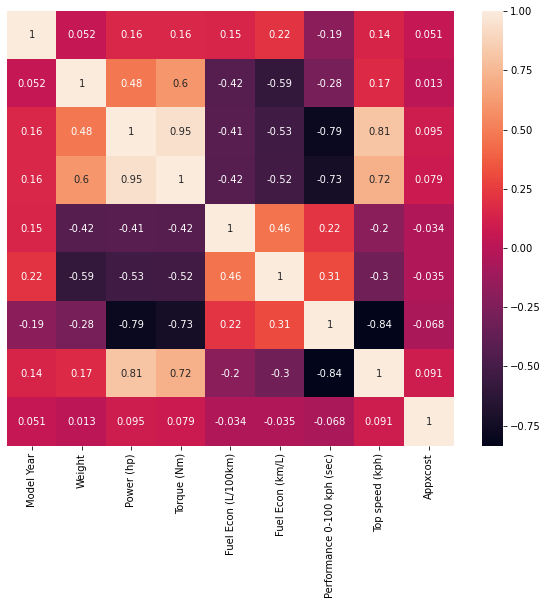

In [7]:
fig=py.figure(figsize=(10,8))
sns.heatmap(data.corr(),yticklabels=False,annot=True)

<AxesSubplot:>

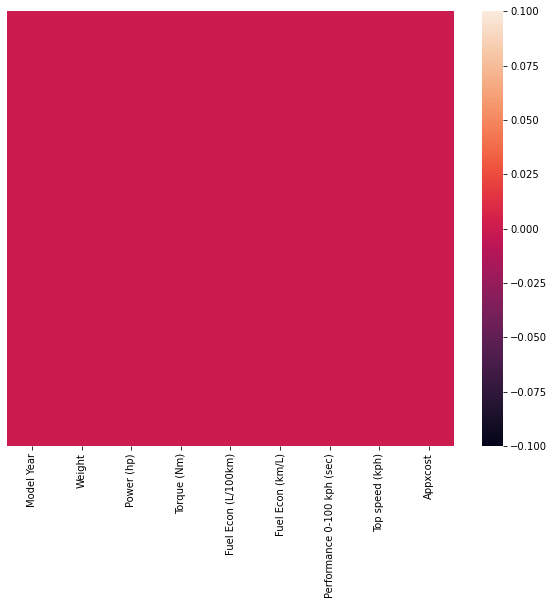

In [8]:
fig=py.figure(figsize=(10,8))
sns.heatmap(data.isnull(),yticklabels=False)

In [51]:
data.columns

Index(['Model Year', 'Weight', 'Power (hp)', 'Torque (Nm)',
       'Fuel Econ (L/100km)', 'Fuel Econ (km/L)',
       'Performance 0-100 kph (sec)', 'Top speed (kph)', 'Appxcost'],
      dtype='object')

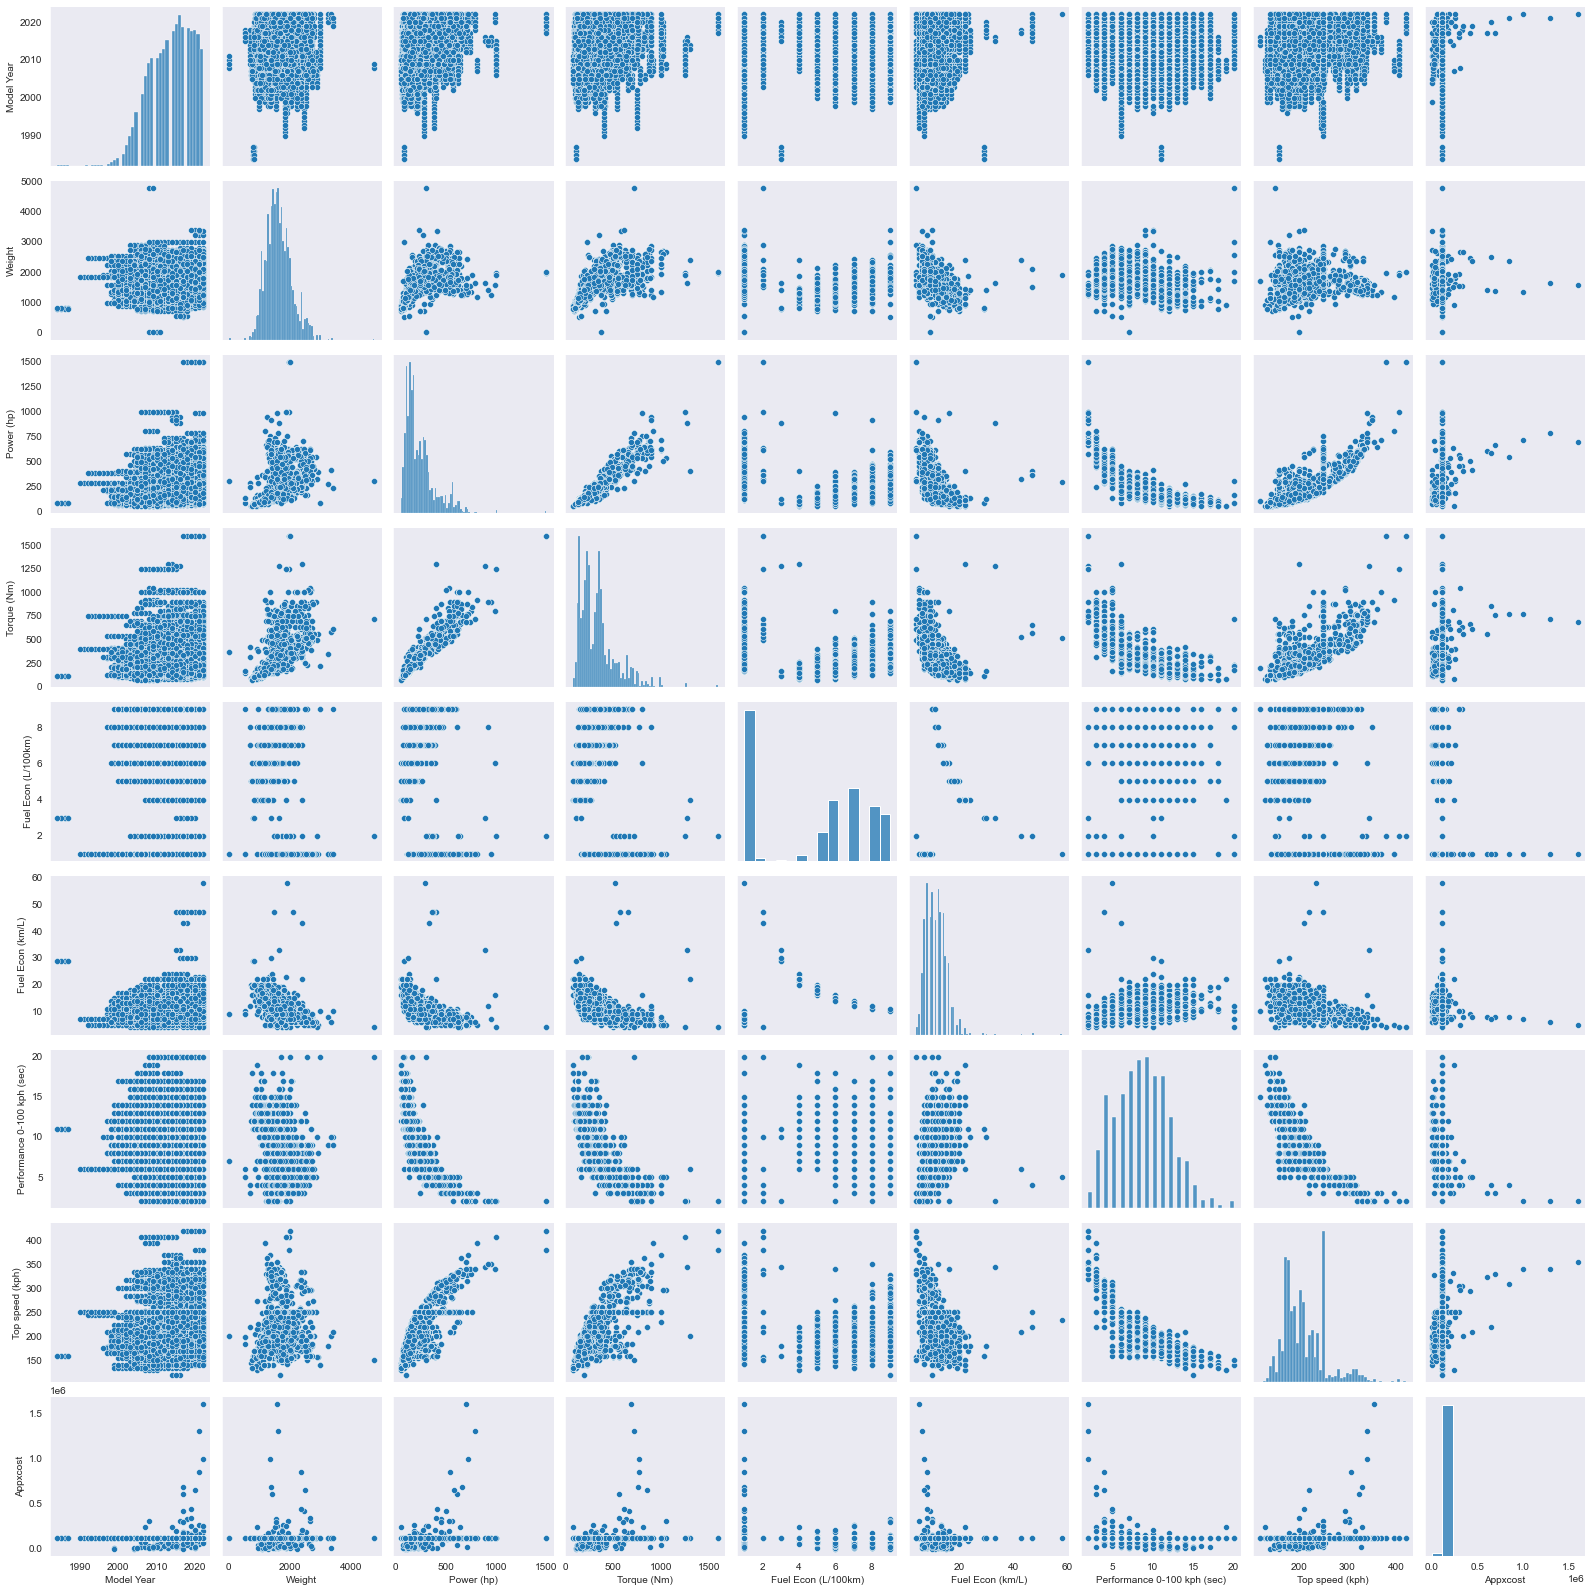

In [52]:
sns.pairplot(data)

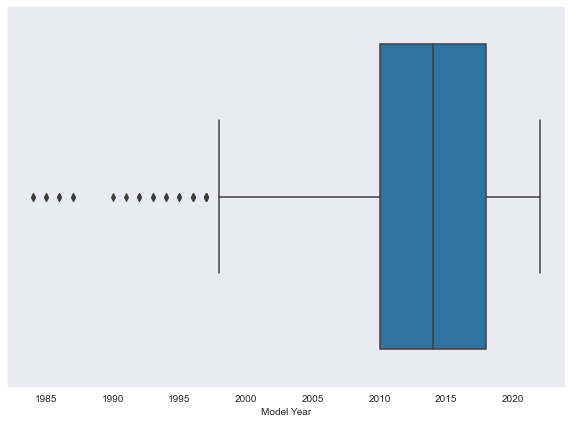

In [15]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Model Year'])
sns.set_style('dark')

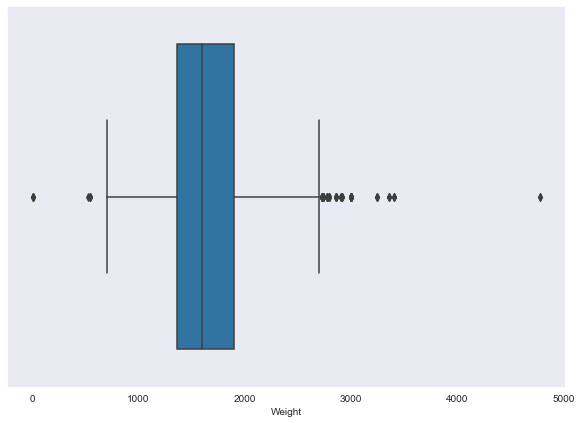

In [16]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Weight'])
sns.set_style('dark')

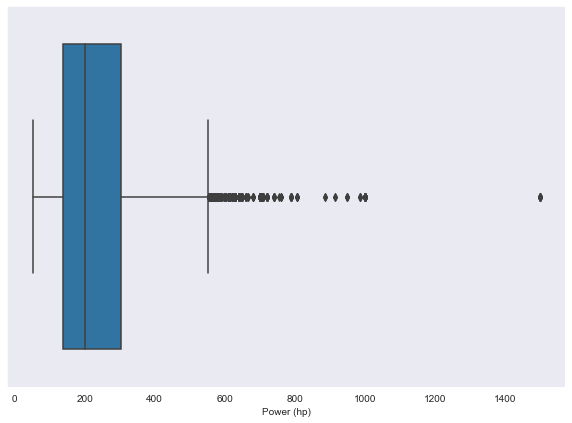

In [17]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Power (hp)'])
sns.set_style('dark')

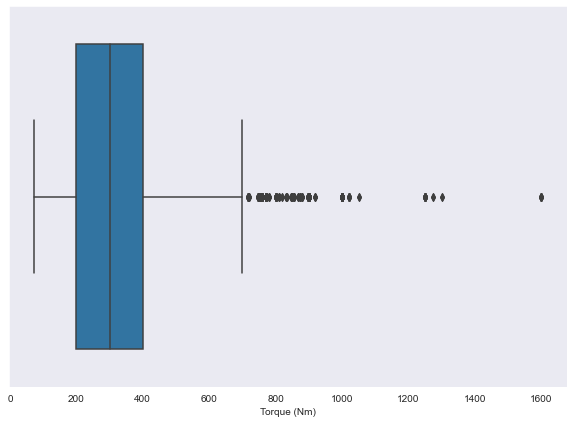

In [18]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Torque (Nm)'])
sns.set_style('dark')

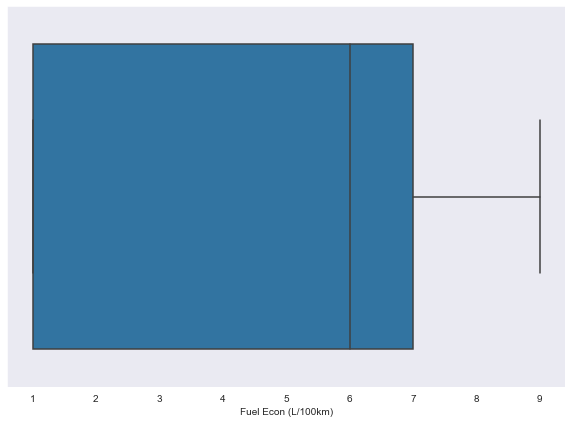

In [19]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Fuel Econ (L/100km)'])
sns.set_style('dark')

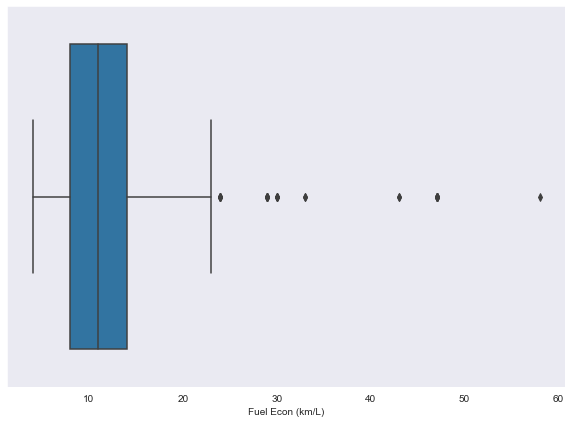

In [20]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Fuel Econ (km/L)'])
sns.set_style('dark')

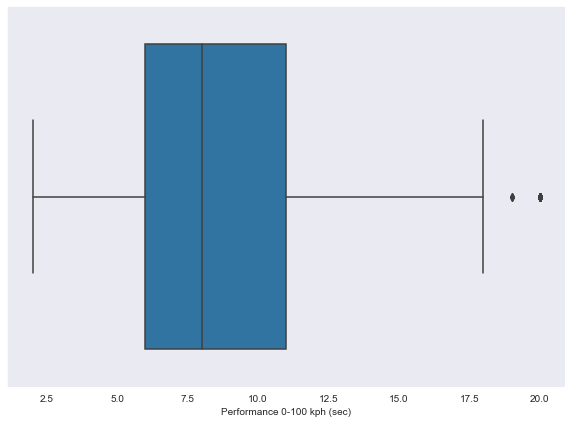

In [21]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Performance 0-100 kph (sec)'])
sns.set_style('dark')

In [22]:
data.columns

Index(['Model Year', 'Weight', 'Power (hp)', 'Torque (Nm)',
       'Fuel Econ (L/100km)', 'Fuel Econ (km/L)',
       'Performance 0-100 kph (sec)', 'Top speed (kph)', 'Appxcost'],
      dtype='object')

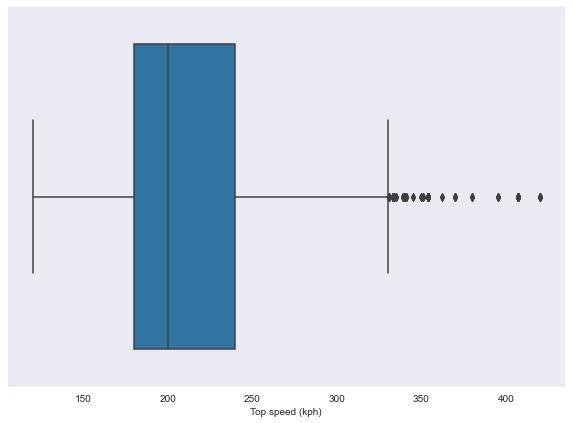

In [23]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Top speed (kph)'])
sns.set_style('dark')

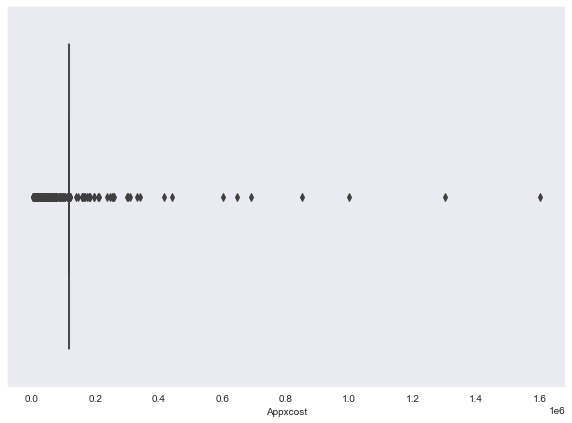

In [24]:
fig=py.figure(figsize=(10,7))
sns.boxplot(x=data['Appxcost'])
sns.set_style('dark')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [26]:
data.columns

Index(['Model Year', 'Weight', 'Power (hp)', 'Torque (Nm)',
       'Fuel Econ (L/100km)', 'Fuel Econ (km/L)',
       'Performance 0-100 kph (sec)', 'Top speed (kph)', 'Appxcost'],
      dtype='object')

In [38]:
X=data.drop('Top speed (kph)', axis=1)

In [39]:
y=data['Top speed (kph)']

In [40]:
X.shape

(7416, 8)

In [41]:
y.shape

(7416,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=102)

In [43]:
from sklearn.linear_model import LinearRegression
Linear=LinearRegression()

In [44]:
Linear.fit(X_train,y_train)

LinearRegression()

In [45]:
Pred=Linear.predict(X_test)

In [46]:
Pred

array([180.52577833, 185.76582996, 258.13538535, ..., 260.39079919,
       207.95408848, 183.26273299])

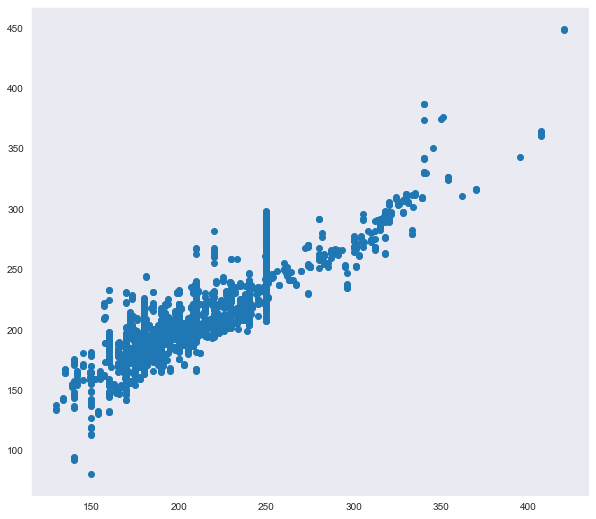

In [50]:
fig=py.figure(figsize=(10,9))
py.scatter(y_test,Pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top speed (kph)', ylabel='Density'>

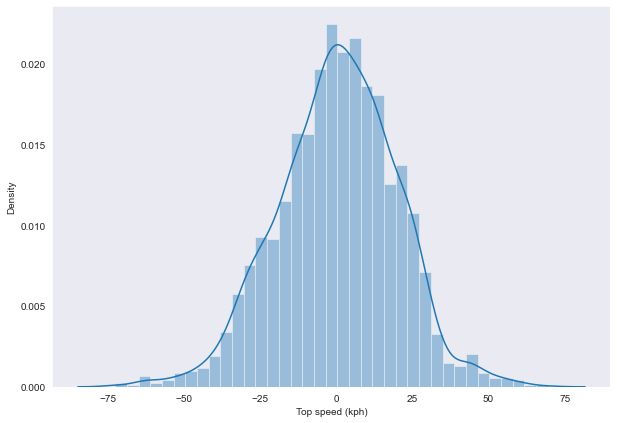

In [49]:
fig=py.figure(figsize=(10,7))
sns.distplot(y_test-Pred)

In [53]:
print(Linear.intercept_)

947.9748108035784


In [56]:
pd.DataFrame(Linear.coef_,columns=['Coeff'])

Coeff
0 -0.350505
1 -0.017030
2  0.209275
3 -0.041212
4  0.826740
5  0.294573
6 -6.076721
7  0.000027

In [57]:
print('Mean Abosulute Error',mean_absolute_error(y_test,Pred))

Mean Abosulute Error 15.329005886423147


In [58]:
print('Mean Squared Error',mean_squared_error(y_test,Pred))

Mean Squared Error 378.57999653157


In [61]:
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,Pred)))

Root Mean Squared Error 19.45713227923298
